# PROJET 4 - Segmentez des clients d'un site e-commerce

L'objectif de cet projet est de : 
  * comprendre les différents types d’utilisateurs 
  * fournir une description actionable de la segmentation et une proposition de contrat de maintenance en évaluant la fréquence à laquelle la segmentation doit être mise à jour

dans le but de créer une segmentation exploitable et facile d’utilisation des clients d'Olist pour ses programmes de communication.

Nous avons à notre disposition des données anonymisée comportant des informations depuis janvier 2017 sur :
  * l’historique de commandes
  * les produits achetés
  * les commentaires de satisfaction
  * la localisation des clients

Ces données sont disponible sur https://www.kaggle.com/olistbr/brazilian-ecommerce.

A partir des données disponibles, nous devons comprendre les différents types d'utilisateurs en utilisant des méthodes non supervisées pour regrouper ensemble des clients de profils similaires (le code devant respecter la convention PEP8).

# Importation des librairies

In [1]:
# coding: utf-8

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats
import scipy.stats as st
import matplotlib.lines as mlines
from scipy import stats
import statsmodels.api as sm
from pandas.api.types import CategoricalDtype
import re
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Chargement des jeux de données

In [ ]:
olist_customers = pd.read_csv('olist_customers_dataset.csv', sep = ",")
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep = ",")
olist_order_items = pd.read_csv(olist_order_items_dataset.csv, sep = ",")
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep = ",")
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep = ",")
olist_orders = pd.read_csv('olist_orders_dataset.csv', sep = ",")
olist_products = pd.read_csv('olist_products_dataset.csv', sep = ",")
olist_sellers = pd.read_csv('olist_sellers_dataset.csv', sep = ",")
product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep = ",")

Nous avons 9 DataFrames reliés entre eux comme le schéma ci-dessus :

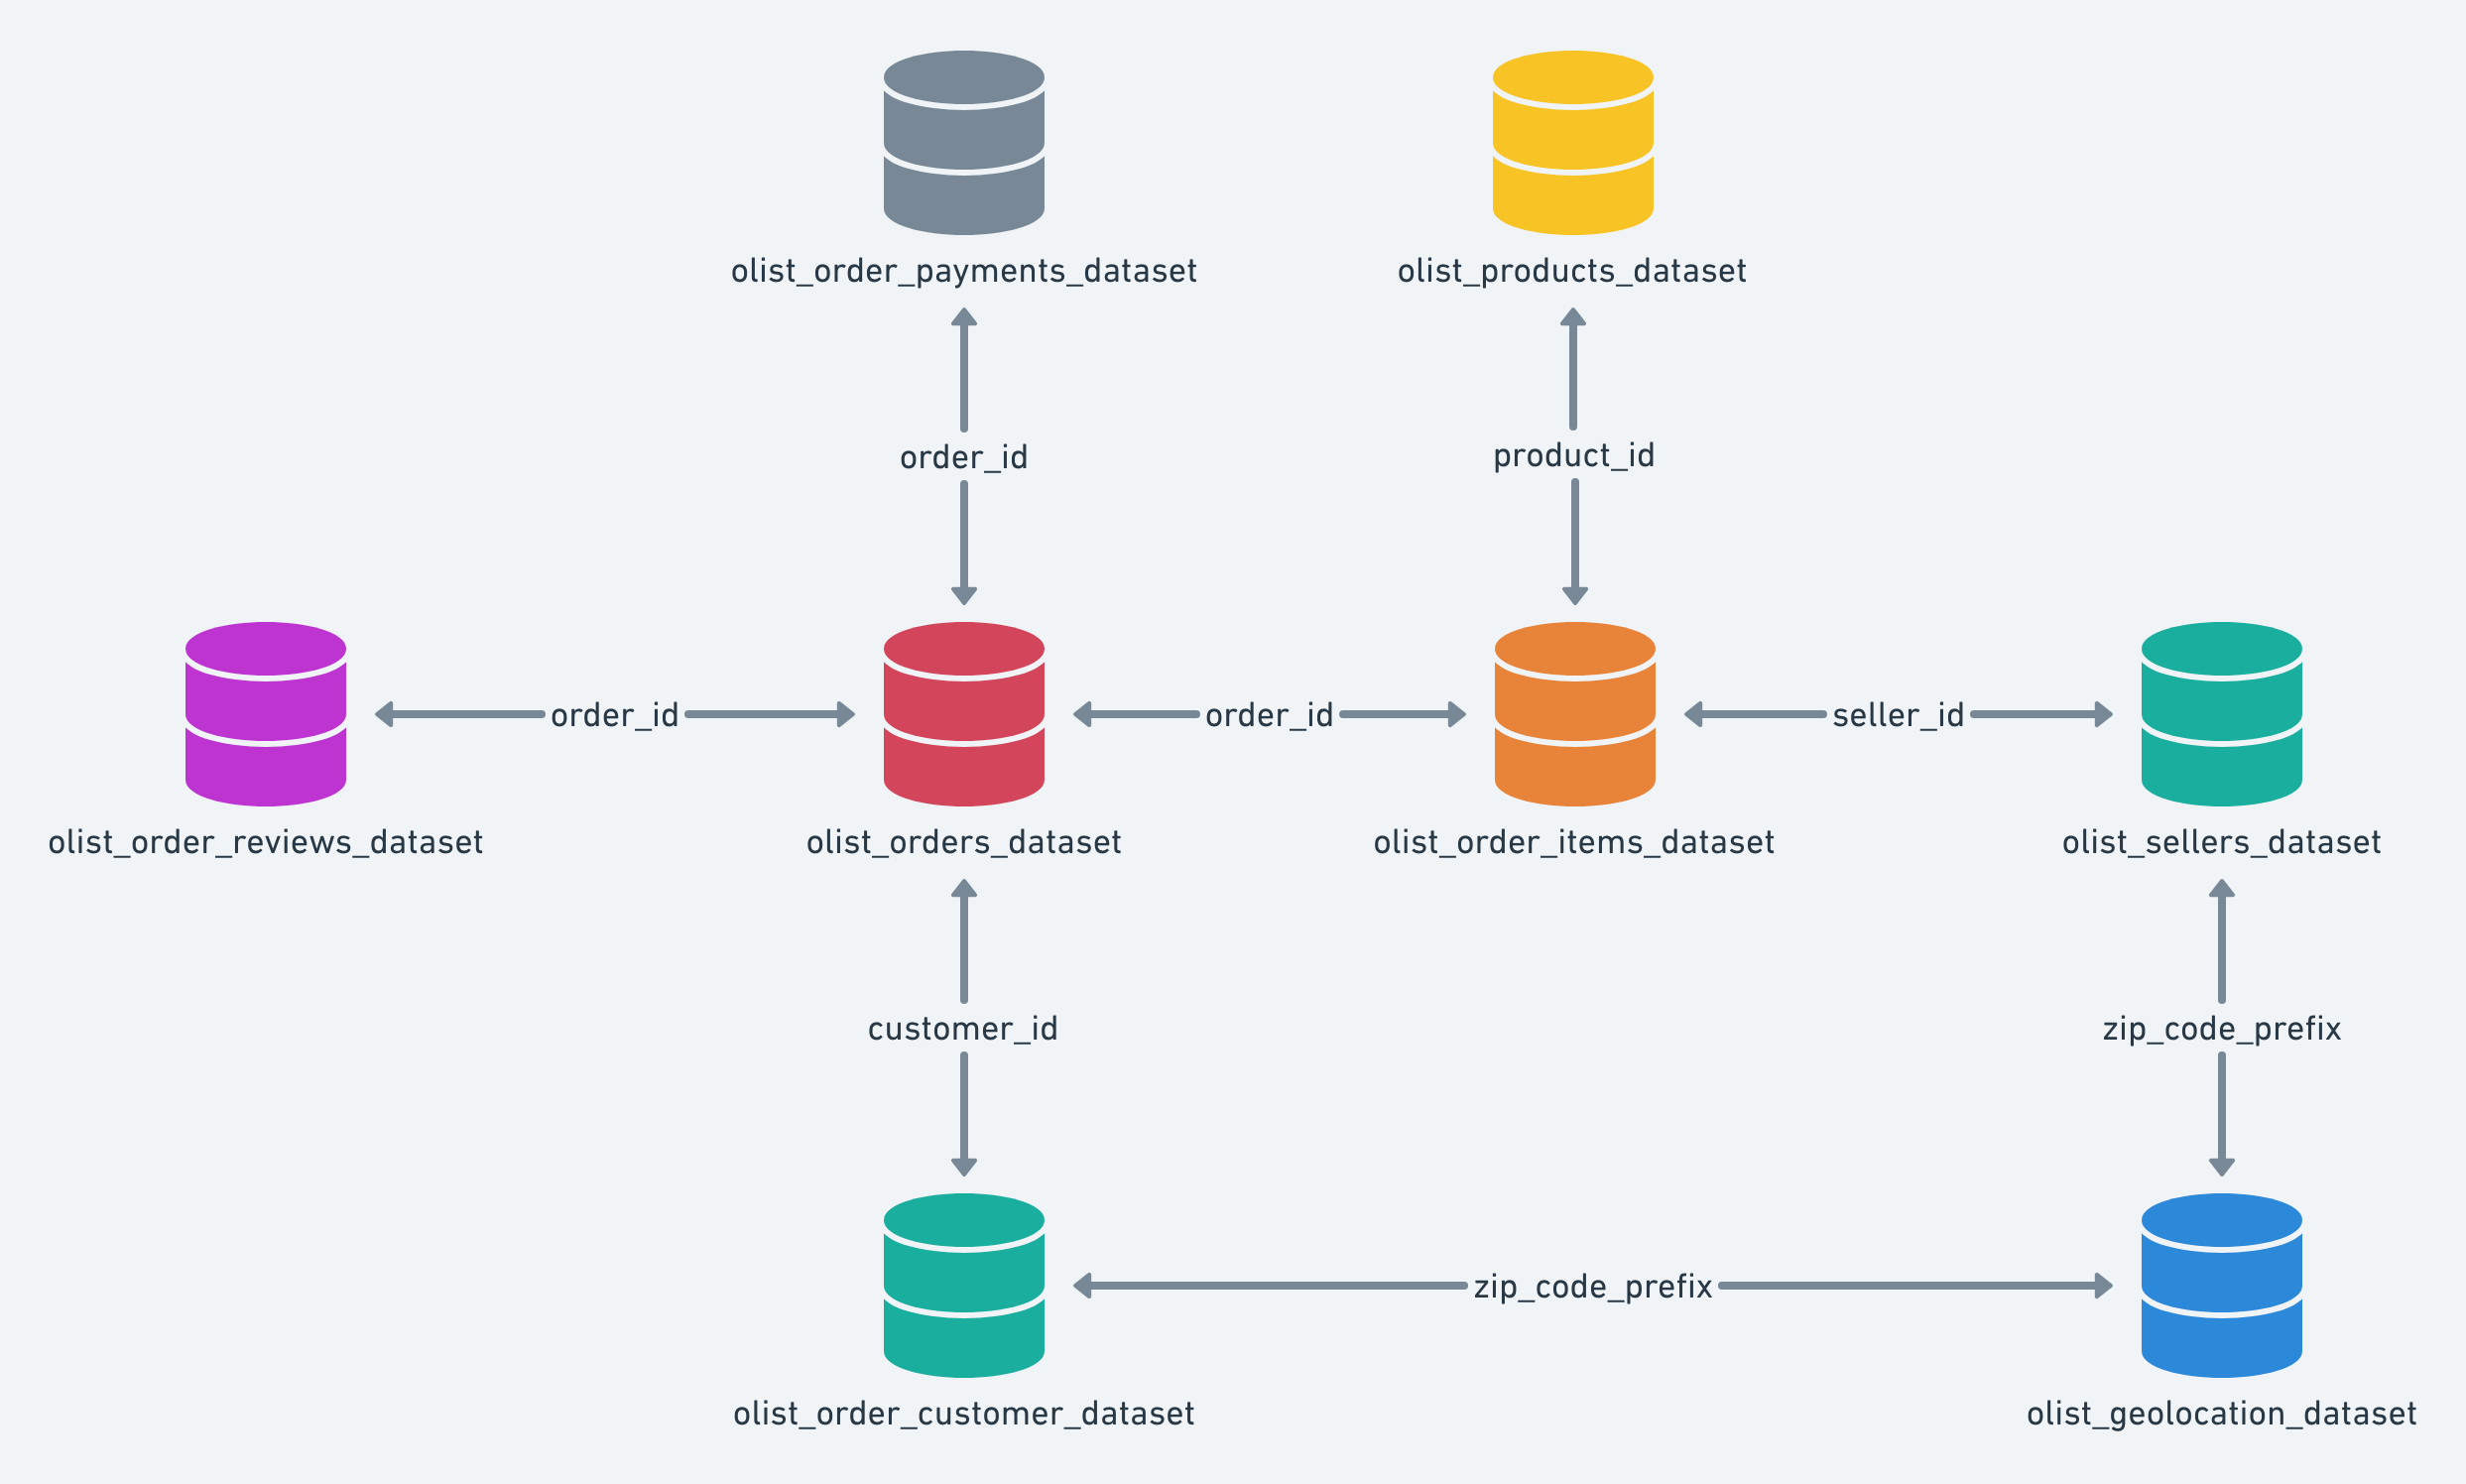

# Première description des jeux de données

In [45]:
liste_data = [olist_customers, olist_geolocation, olist_order_items, olist_order_payments, olist_order_reviews, olist_orders, olist_products, olist_sellers, product_category_name_translation]
liste_data_nom = ['olist_customers', 'olist_geolocation', 'olist_order_items', 'olist_order_payments', 'olist_order_reviews', 'olist_orders', 'olist_products', 'olist_sellers', 'product_category_name_translation']

for data, data_nom in zip(liste_data, liste_data_nom) :
  display(data.head(8))
  display(data.describe(include="all"))
  print('\n')
  print('Pour le DataFrame ', data_nom)
  print('Les variables de ', data_nom, 'sont', list(data.columns))
  print("nombre de dimensions de data: ", data.ndim)
  print("forme de data: ", data.shape)
  print("taille de data: ", data.size)
  print('nombre de NaN:', data.isnull().sum().sum())
  print("Le DataFrame est composé de", data.shape[0], "lignes et de", data.shape[1], "colonnes.")
  print('\n')
  print('---------------------------------------------------')
  print('\n')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,800757ab822eb1712cc8c613225eae2b,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN




Pour le DataFrame  olist_customers
Les variables de  olist_customers sont ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
nombre de dimensions de data:  2
forme de data:  (99441, 5)
taille de data:  497205
nombre de NaN: 0
Le DataFrame est composé de 99441 lignes et de 5 colonnes.


---------------------------------------------------




,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN




Pour le DataFrame  olist_geolocation
Les variables de  olist_geolocation sont ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
nombre de dimensions de data:  2
forme de data:  (1000163, 5)
taille de data:  5000815
nombre de NaN: 0
Le DataFrame est composé de 1000163 lignes et de 5 colonnes.


---------------------------------------------------




,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000




Pour le DataFrame  olist_order_items
Les variables de  olist_order_items sont ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
nombre de dimensions de data:  2
forme de data:  (112650, 7)
taille de data:  788550
nombre de NaN: 0
Le DataFrame est composé de 112650 lignes et de 7 colonnes.


---------------------------------------------------




,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500




Pour le DataFrame  olist_order_payments
Les variables de  olist_order_payments sont ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
nombre de dimensions de data:  2
forme de data:  (103886, 5)
taille de data:  519430
nombre de NaN: 0
Le DataFrame est composé de 103886 lignes et de 5 colonnes.


---------------------------------------------------




,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000.000000,11715,41753,100000,100000
unique,99173,99441,NaN,4600,36921,637,99010
top,ddc52555ca27b0fe67d5255147682d2d,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,426,230,466,4
mean,NaN,NaN,4.070890,NaN,NaN,NaN,NaN
std,NaN,NaN,1.359663,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN




Pour le DataFrame  olist_order_reviews
Les variables de  olist_order_reviews sont ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
nombre de dimensions de data:  2
forme de data:  (100000, 7)
taille de data:  700000
nombre de NaN: 146532
Le DataFrame est composé de 100000 lignes et de 7 colonnes.


---------------------------------------------------




,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,7be14973fae210892bdead0de13695e6,800757ab822eb1712cc8c613225eae2b,delivered,2017-11-20 10:59:08,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522




Pour le DataFrame  olist_orders
Les variables de  olist_orders sont ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
nombre de dimensions de data:  2
forme de data:  (99441, 8)
taille de data:  795528
nombre de NaN: 4908
Le DataFrame est composé de 99441 lignes et de 8 colonnes.


---------------------------------------------------




,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6845447c5d4495dcddca6e6b494df3e7,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000




Pour le DataFrame  olist_products
Les variables de  olist_products sont ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
nombre de dimensions de data:  2
forme de data:  (32951, 9)
taille de data:  296559
nombre de NaN: 2448
Le DataFrame est composé de 32951 lignes et de 9 colonnes.


---------------------------------------------------




,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,90b36c5aeb728d5504a39f435bef0c5f,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN




Pour le DataFrame  olist_sellers
Les variables de  olist_sellers sont ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']
nombre de dimensions de data:  2
forme de data:  (3095, 4)
taille de data:  12380
nombre de NaN: 0
Le DataFrame est composé de 3095 lignes et de 4 colonnes.


---------------------------------------------------




,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,papelaria,fashion_underwear_beach
freq,1,1




Pour le DataFrame  product_category_name_translation
Les variables de  product_category_name_translation sont ['product_category_name', 'product_category_name_english']
nombre de dimensions de data:  2
forme de data:  (71, 2)
taille de data:  142
nombre de NaN: 0
Le DataFrame est composé de 71 lignes et de 2 colonnes.


---------------------------------------------------




# Nettoyage des jeux de données

## Nombre de données manquantes dans les DataFrames

In [46]:
## Graphe du nombre de données manquantes

def graphe_donnees_manquantes(data, data_nom) :
  nb_donnees_tot = len(data)*len(data.columns)
  donnees_NaN = data.isnull().sum().sum()
  donnees_presentes = nb_donnees_tot - donnees_NaN
  
  x = np.array([donnees_NaN, donnees_presentes])
  label = ["Données manquantes", "Données présentes"]
  
  plt.pie(x, explode=(0.1, 0), labels=label, colors=['tomato', 'blue'], autopct='%1.1f%%', shadow=True, startangle=90)
  plt.title('Diagramme circulaire des données présentes et manquantes pour '+ data_nom)
  plt.show()

Pour le DataFrame  olist_customers


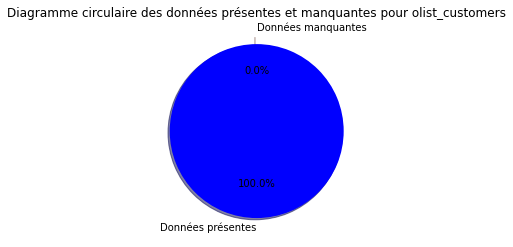



customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


---------------------------------------------------


Pour le DataFrame  olist_geolocation


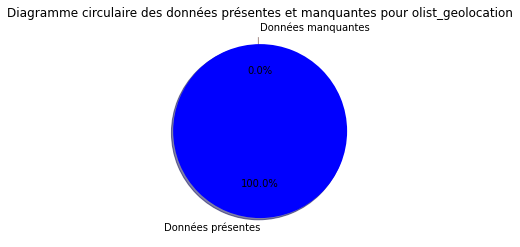



geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


---------------------------------------------------


Pour le DataFrame  olist_order_items


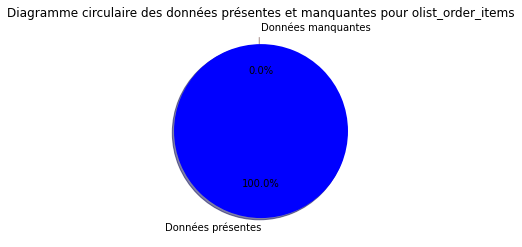



order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


---------------------------------------------------


Pour le DataFrame  olist_order_payments


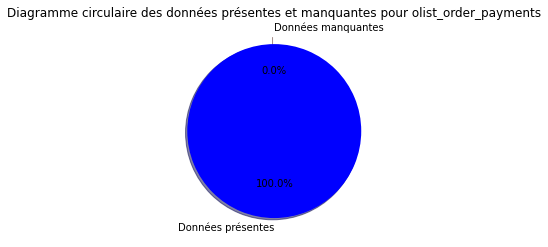



order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


---------------------------------------------------


Pour le DataFrame  olist_order_reviews


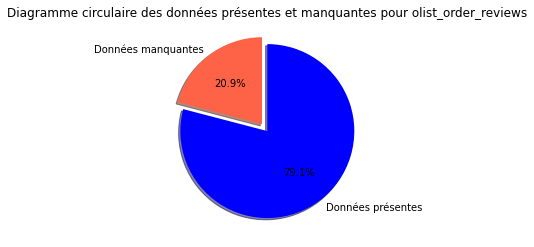



review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


---------------------------------------------------


Pour le DataFrame  olist_orders


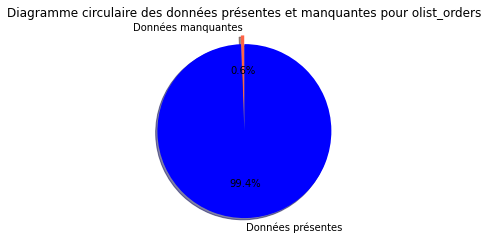



order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


---------------------------------------------------


Pour le DataFrame  olist_products


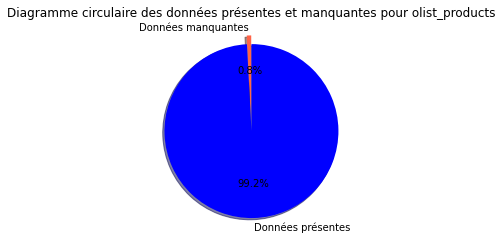



product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


---------------------------------------------------


Pour le DataFrame  olist_sellers


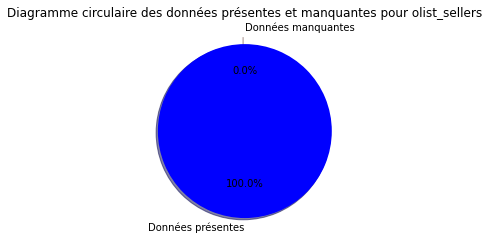



seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


---------------------------------------------------


Pour le DataFrame  product_category_name_translation


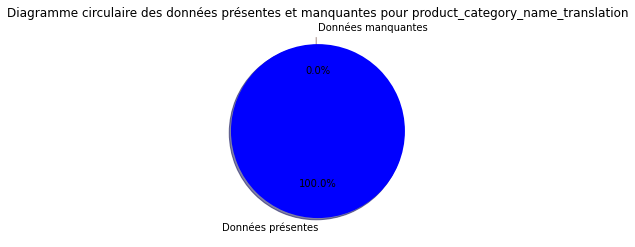



product_category_name            0
product_category_name_english    0
dtype: int64


---------------------------------------------------




In [47]:
for data, data_nom in zip(liste_data, liste_data_nom) :
  print('Pour le DataFrame ', data_nom)
  graphe_donnees_manquantes(data, data_nom)
  print('\n')
  print(data.isnull().sum(axis = 0))
  print('\n')
  print('---------------------------------------------------')
  print('\n')

## Création de nouvelles variables

In [48]:
olist_customers['customer_zip_code_prefix'] = olist_customers['customer_zip_code_prefix'].astype(str)

olist_order_reviews['review_answer_timestamp'] = olist_order_reviews['review_answer_timestamp'].astype('datetime64[D]')
olist_order_reviews['review_creation_date'] = olist_order_reviews['review_creation_date'].astype('datetime64[D]')

olist_orders['order_purchase_timestamp'] = olist_orders['order_purchase_timestamp'].astype('datetime64[D]')
olist_orders['order_delivered_customer_date'] = olist_orders['order_delivered_customer_date'].astype('datetime64[D]')
olist_orders['order_estimated_delivery_date'] = olist_orders['order_estimated_delivery_date'].astype('datetime64[D]')

In [49]:
olist_order_reviews['temps_reponse_enquete'] = (pd.to_datetime(olist_order_reviews['review_answer_timestamp']) - pd.to_datetime(olist_order_reviews['review_creation_date'])).dt.days
olist_orders['duree_livraison'] = (pd.to_datetime(olist_orders['order_delivered_customer_date']) - pd.to_datetime(olist_orders['order_purchase_timestamp'])).dt.days
olist_orders['duree_livraison_estimee'] = (pd.to_datetime(olist_orders['order_estimated_delivery_date']) - pd.to_datetime(olist_orders['order_purchase_timestamp'])).dt.days

olist_orders['statut_livraison'] = np.where(olist_orders['order_status'] == 'delivered', 'Livré', 'Non livré')

In [50]:
olist_orders[olist_orders['duree_livraison'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duree_livraison,duree_livraison_estimee,statut_livraison
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017-04-13 13:25:17,NaN,NaT,2017-05-09,NaN,28,Non livré
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,NaN,24,Non livré
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03,2018-08-07 06:15:14,NaN,NaT,2018-08-21,NaN,18,Non livré
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03,2017-09-03 14:30:09,NaN,NaT,2017-10-03,NaN,30,Non livré
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,NaN,28,Non livré
...,...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31,NaN,NaN,NaT,2018-10-01,NaN,31,Non livré
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05,2018-01-09 07:18:05,NaN,NaT,2018-02-06,NaN,32,Non livré
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06,NaN,NaN,NaT,2018-09-27,NaN,21,Non livré
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23,2017-08-28 15:44:47,NaN,NaT,2017-09-15,NaN,23,Non livré


In [51]:
olist_orders[olist_orders['duree_livraison'].isna()]['statut_livraison'].value_counts()

Non livré    2957
Livré           8
Name: statut_livraison, dtype: int64

In [52]:
olist_orders[olist_orders['duree_livraison'].isna()][olist_orders[olist_orders['duree_livraison'].isna()]['statut_livraison'] == 'Livré']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duree_livraison,duree_livraison_estimee,statut_livraison
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,NaN,20,Livré
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,NaN,26,Livré
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,NaN,29,Livré
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,NaN,29,Livré
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,NaN,23,Livré
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25,2017-05-25 23:30:16,NaN,NaT,2017-06-23,NaN,29,Livré
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,NaN,18,Livré
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,NaN,22,Livré


In [53]:
olist_orders.at[3002, 'duree_livraison'] = olist_orders.at[3002, 'duree_livraison_estimee']
olist_orders.at[20618, 'duree_livraison'] = olist_orders.at[20618, 'duree_livraison_estimee']
olist_orders.at[43834, 'duree_livraison'] = olist_orders.at[43834, 'duree_livraison_estimee']
olist_orders.at[79263, 'duree_livraison'] = olist_orders.at[79263, 'duree_livraison_estimee']
olist_orders.at[82868, 'duree_livraison'] = olist_orders.at[82868, 'duree_livraison_estimee']
olist_orders.at[92643, 'duree_livraison'] = olist_orders.at[92643, 'duree_livraison_estimee']
olist_orders.at[97647, 'duree_livraison'] = olist_orders.at[97647, 'duree_livraison_estimee']
olist_orders.at[98038, 'duree_livraison'] = olist_orders.at[98038, 'duree_livraison_estimee']

In [54]:
olist_orders[olist_orders['duree_livraison'].isna()][olist_orders[olist_orders['duree_livraison'].isna()]['statut_livraison'] == 'Livré']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duree_livraison,duree_livraison_estimee,statut_livraison


In [55]:
olist_orders['duree_livraison'].max()

210.0

In [56]:
olist_orders['duree_livraison'] = olist_orders['duree_livraison'].fillna(500)

In [57]:
olist_orders[olist_orders['duree_livraison'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duree_livraison,duree_livraison_estimee,statut_livraison


In [58]:
olist_order_items['price_freight_sum'] = olist_order_items[['price', 'freight_value']].sum(axis = 1)
olist_order_items['price_freight_sum'] = olist_order_items['price_freight_sum'].round(3)
olist_order_payments['payment_value'] = olist_order_payments['payment_value'].round(3)
olist_products['volume_produit'] = olist_products['product_length_cm']*olist_products['product_width_cm']*olist_products['product_height_cm']
olist_order_payments['payment_type_credit_card'] = np.where(olist_order_payments['payment_type'] == 'credit_card', 'credit_card', 'autre')

In [59]:
olist_order_items_2 = olist_order_items[['price', 'freight_value', 'order_id']].groupby(['order_id'], as_index=False).sum()
dt = olist_order_payments[['payment_value', 'order_id']].groupby(['order_id'], as_index=False).sum()

olist_order_items_2 = olist_order_items_2.merge(dt, on = ['order_id'], how = 'outer')
olist_order_items_2['somme'] = olist_order_items_2[['freight_value', 'price']].sum(axis = 1)
olist_order_items_2['difference'] = (olist_order_items_2['somme'] - olist_order_items_2['payment_value']).abs()
olist_order_items_2[['price',	'freight_value',	'payment_value',	'somme',	'difference']] = olist_order_items_2[['price',	'freight_value',	'payment_value',	'somme',	'difference']].round(2)
olist_order_items_2

,order_id,price,freight_value,payment_value,somme,difference
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19,72.19,0.00
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83,259.83,0.00
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87,216.87,0.00
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78,25.78,0.00
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04,218.04,0.00
...,...,...,...,...,...,...
99436,fdcca0e15a4d03e3fb89fb14664a3744,NaN,NaN,29.59,0.00,29.59
99437,fddbd183387b5c9bcbafbd0fe965301f,NaN,NaN,40.00,0.00,40.00
99438,fe87d4b944748f63ca5ed22cc55b6fb6,NaN,NaN,173.68,0.00,173.68
99439,feae5ecdf2cc16c1007741be785fe3cd,NaN,NaN,68.53,0.00,68.53


## Nettoyage des variables qualitatives

In [60]:
olist_customers['customer_zip_code_prefix'].unique()

array(['14409', '9790', '1151', ..., '5538', '74980', '99043'],
      dtype=object)

In [61]:
olist_customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [62]:
olist_sellers['seller_state'].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

In [63]:
olist_sellers['seller_state'].value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
PA       1
PI       1
AM       1
MA       1
AC       1
Name: seller_state, dtype: int64

In [64]:
olist_order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [65]:
olist_order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [66]:
olist_order_payments['payment_type_credit_card'].unique()

array(['credit_card', 'autre'], dtype=object)

In [67]:
olist_order_payments['payment_type_credit_card'].value_counts()

credit_card    76795
autre          27091
Name: payment_type_credit_card, dtype: int64

In [68]:
olist_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [69]:
olist_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [70]:
olist_orders['statut_livraison'].value_counts()

Livré        96478
Non livré     2963
Name: statut_livraison, dtype: int64

In [71]:
print(len(olist_products['product_category_name'].unique()))
print(olist_products['product_category_name'].unique())

74
['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' nan 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos_de_festas' 'bebidas' 'market_place'
 'la_cuisine' 'co

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


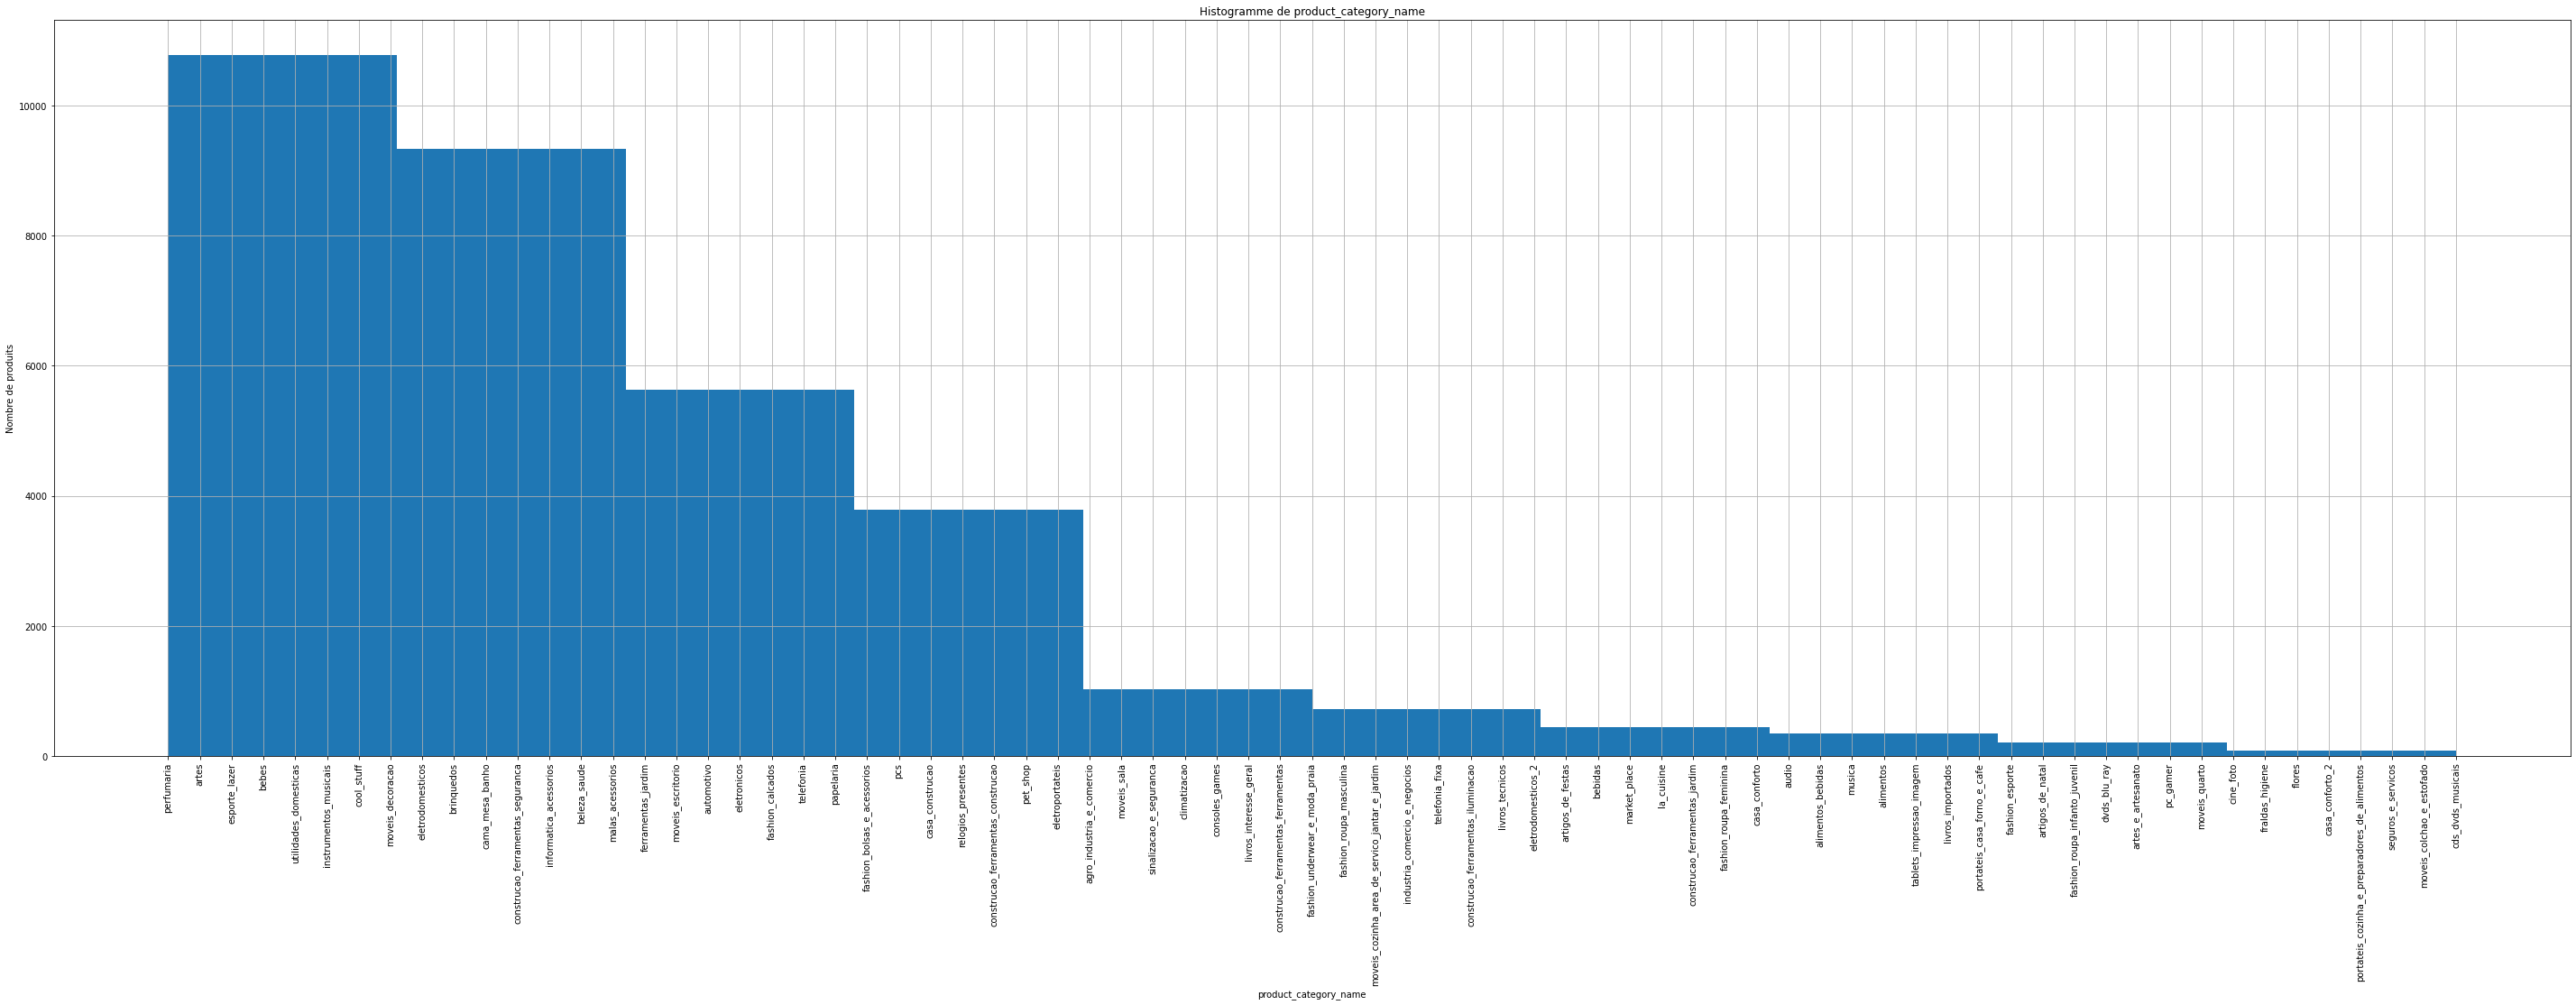

In [72]:
fig = plt.figure(figsize = (50, 15))
olist_products['product_category_name'].hist()
ax = plt.axes()
ax = ax.set(xlabel='product_category_name', ylabel='Nombre de produits')
plt.title('Histogramme de product_category_name')
plt.xticks(rotation=90)
plt.show()

In [73]:
olist_products = olist_products.merge(product_category_name_translation, on = ['product_category_name'], how = 'outer')
olist_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_produit,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,2700.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,6048.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,3757.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,3510.0,perfumery
...,...,...,...,...,...,...,...,...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,15625.0,furniture_mattress_and_upholstery
32947,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,18081.0,furniture_mattress_and_upholstery
32948,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,262800.0,furniture_mattress_and_upholstery
32949,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,70000.0,furniture_mattress_and_upholstery


In [74]:
olist_products['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

In [75]:
print('La variable product_category_name_english est composée de', len(olist_products['product_category_name_english'].unique()), 'catégoories.')

La variable product_category_name_english est composée de 72 catégoories.


In [76]:
olist_products['product_category_name_english'].value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: product_category_name_english, Length: 71, dtype: int64

In [77]:
dic = {'fashion_bags_accessories' : 'mode', 'fashion_shoes' : 'mode', 'fashion_male_clothing' : 'mode', 'fashio_female_clothing' : 'mode', 'fashion_childrens_clothes' : 'mode', 'fashion_underwear_beach' : 'mode', 'fashion_sport' : 'mode',
       'bed_bath_table' : 'meuble', 'furniture_decor' : 'meuble', 'furniture_living_room' : 'meuble', 'furniture_bedroom' : 'meuble', 'office_furniture' : 'meuble', 'kitchen_dining_laundry_garden_furniture' : 'meuble', 'furniture_mattress_and_upholstery' : 'meuble',
       'construction_tools_construction' : 'construction', 'costruction_tools_garden' : 'construction', 'costruction_tools_tools' : 'construction', 'home_construction' : 'construction', 'construction_tools_lights' : 'construction', 'construction_tools_safety' : 'construction', 'garden_tools' : 'construction', 
       'food_drink' : 'nourriture', 'food' : 'nourriture', 'drinks' : 'nourriture', 'la_cuisine' : 'nourriture',
       'cine_photo' : 'loisirs', 'music' : 'loisirs', 'cds_dvds_musicals' : 'loisirs',  'dvds_blu_ray' : 'loisirs', 'sports_leisure' : 'loisirs', 'musical_instruments' : 'loisirs', 'books_technical' : 'loisirs', 'books_general_interest' : 'loisirs', 'books_imported' : 'loisirs', 'consoles_games' : 'loisirs', 'art' : 'loisirs', 'arts_and_craftmanship' : 'loisirs',
       'baby' : 'enfance', 'toys' : 'enfance', 'diapers_and_hygiene' : 'enfance',
       'health_beauty' : 'sante_et_beaute', 'perfumery' : 'sante_et_beaute', 
       'housewares' : 'maison', 'home_appliances' : 'maison', 'home_appliances_2' : 'maison', 'home_confort' : 'maison', 'home_comfort_2' : 'maison', 'air_conditioning' : 'maison', 'small_appliances' : 'maison', 'small_appliances_home_oven_and_coffee' : 'maison',
       'computers_accessories' : 'tech', 'telephony' : 'tech', 'tablets_printing_image' : 'tech', 'fixed_telephony' : 'tech', 'audio' : 'tech', 'electronics' : 'tech', 'computers' : 'tech',
       'party_supplies' : 'accessoires', 'christmas_supplies' : 'accessoires', 'flowers' : 'accessoires', 'stationery' : 'accessoires', 'luggage_accessories' : 'accessoires', 
       'security_and_services' : 'securite', 'signaling_and_security' : 'securite',
       'cool_stuff' : 'divers', 'pet_shop' : 'divers', 'market_place' : 'divers', 'agro_industry_and_commerce' : 'divers', 'industry_commerce_and_business' : 'divers', 'auto' : 'divers', 'watches_gifts' : 'divers'} 

In [78]:
olist_products['product_category_name_english'] = olist_products['product_category_name_english'].map(dic).fillna(olist_products['product_category_name_english'])
olist_products['product_category_name_english'].unique()

array(['sante_et_beaute', 'loisirs', 'enfance', 'maison', 'divers',
       'meuble', 'construction', 'tech', 'accessoires', 'mode', nan,
       'securite', 'nourriture'], dtype=object)

In [79]:
olist_products['product_category_name_english'].value_counts()

meuble             6300
divers             4983
loisirs            4021
tech               3503
sante_et_beaute    3312
maison             3297
enfance            2342
construction       1674
accessoires        1303
mode               1221
nourriture          277
securite             95
Name: product_category_name_english, dtype: int64

In [80]:
olist_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [81]:
olist_customers_2 = olist_customers[['customer_zip_code_prefix', 'customer_city', 'customer_state']]
olist_customers_2.rename(columns={'customer_zip_code_prefix' : 'geolocation_zip_code_prefix'}, inplace = True)
olist_customers_2.drop_duplicates(keep = 'first', inplace=True)
olist_customers_2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,geolocation_zip_code_prefix,customer_city,customer_state
0,14409,franca,SP
1,9790,sao bernardo do campo,SP
2,1151,sao paulo,SP
3,8775,mogi das cruzes,SP
4,13056,campinas,SP
...,...,...,...
99376,87145,paicandu,PR
99379,98860,eugenio de castro,RS
99382,5538,sao paulo,SP
99406,74980,aparecida de goiania,GO


In [82]:
olist_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [83]:
olist_geolocation['geolocation_city'] = olist_geolocation['geolocation_city'].str.lower()
olist_geolocation['geolocation_city'] = olist_geolocation['geolocation_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

olist_geolocation_2 = olist_geolocation.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], as_index=False).mean()
olist_geolocation_2['geolocation_zip_code_prefix'] = olist_geolocation_2['geolocation_zip_code_prefix'].astype(str)
olist_geolocation_2

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550190,-46.634024
1,1002,sao paulo,SP,-23.548146,-46.634979
2,1003,sao paulo,SP,-23.548994,-46.635731
3,1004,sao paulo,SP,-23.549799,-46.634757
4,1005,sao paulo,SP,-23.549456,-46.636733
...,...,...,...,...,...
19612,99960,charrua,RS,-27.953722,-52.025511
19613,99965,agua santa,RS,-28.183372,-52.039850
19614,99970,ciriaco,RS,-28.343766,-51.874689
19615,99980,david canabarro,RS,-28.389129,-51.843836


In [84]:
dt = pd.merge(olist_customers_2, olist_geolocation_2, on = ['geolocation_zip_code_prefix'], how = 'inner')
dt

,geolocation_zip_code_prefix,customer_city,customer_state,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,14409,franca,SP,franca,SP,-20.498489,-47.396929
1,9790,sao bernardo do campo,SP,sao bernardo do campo,SP,-23.727992,-46.542848
2,1151,sao paulo,SP,sao paulo,SP,-23.531642,-46.656289
3,8775,mogi das cruzes,SP,mogi das cruzes,SP,-23.499702,-46.185233
4,13056,campinas,SP,campinas,SP,-22.975100,-47.142925
...,...,...,...,...,...,...,...
15418,87145,paicandu,PR,paicandu,PR,-23.501992,-52.150755
15419,98860,eugenio de castro,RS,eugenio de castro,RS,-28.527590,-54.145960
15420,5538,sao paulo,SP,sao paulo,SP,-23.588483,-46.737908
15421,74980,aparecida de goiania,GO,aparecida de goiania,GO,-16.822735,-49.248175


In [85]:
dt.isnull().sum(axis = 0)

geolocation_zip_code_prefix    0
customer_city                  0
customer_state                 0
geolocation_city               0
geolocation_state              0
geolocation_lat                0
geolocation_lng                0
dtype: int64

In [86]:
dt[dt['customer_state'] != dt['geolocation_state']]

,geolocation_zip_code_prefix,customer_city,customer_state,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
166,78557,sinop,MT,nova brasilandia d'oeste,RO,-11.875142,-55.503020
640,21550,rio de janeiro,RJ,rio de janeiro,AC,-22.857861,-43.352613
3211,80630,curitiba,PR,balneario de picarras,SC,-26.757371,-48.675738
3479,4011,sao paulo,SP,sao paulo,AC,-23.578707,-46.645779
4178,72915,aguas lindas de goias,GO,taguatinga,DF,-12.408760,-46.428287
5092,79750,nova andradina,MS,nova andradina,RS,-22.242062,-53.343159
5717,23056,rio de janeiro,RJ,rio de janeiro,AC,-22.919164,-43.611097


En vérifiant les données de ZipCode sur le site https://worldpostalcode.com/lookup, les informations contenues dans les colonnes 'customer_city' et 'customer_state' sont correctes et seront celles utilisées dans la suite de l'analyse. 

## Nettoyage des variables quantitatives

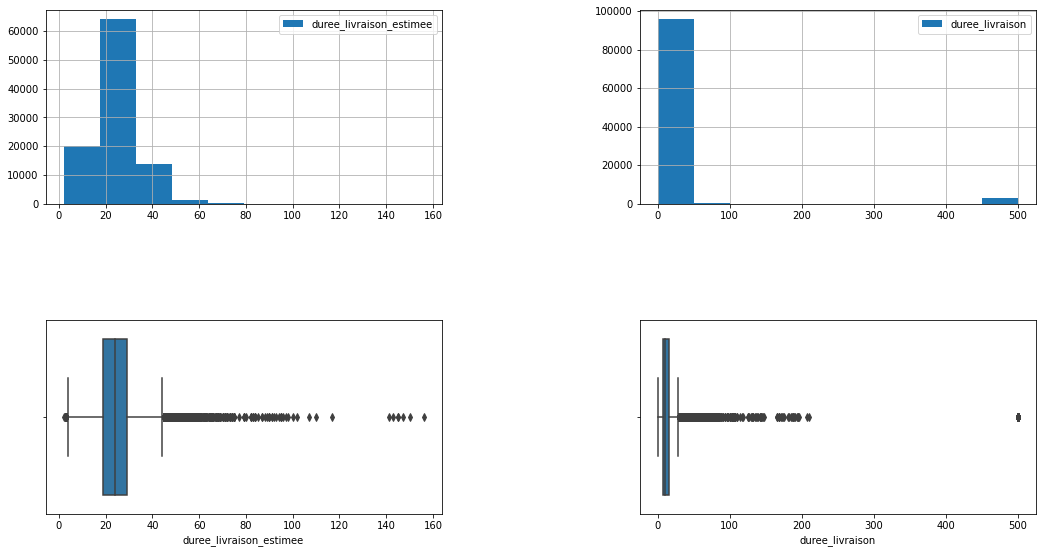

In [87]:
plt.figure(1,figsize=(10,10))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5, top = 0.9, wspace = 0.5, hspace = 0.6)

plt.subplot(2,2,1)
olist_orders['duree_livraison_estimee'].hist(legend = 'duree_livraison_estimee')

plt.subplot(2,2,2)
olist_orders['duree_livraison'].hist(legend = 'duree_livraison')

plt.subplot(2,2,3)
sns.boxplot(x = 'duree_livraison_estimee', data = olist_orders)

plt.subplot(2,2,4)
sns.boxplot(x = 'duree_livraison', data = olist_orders)

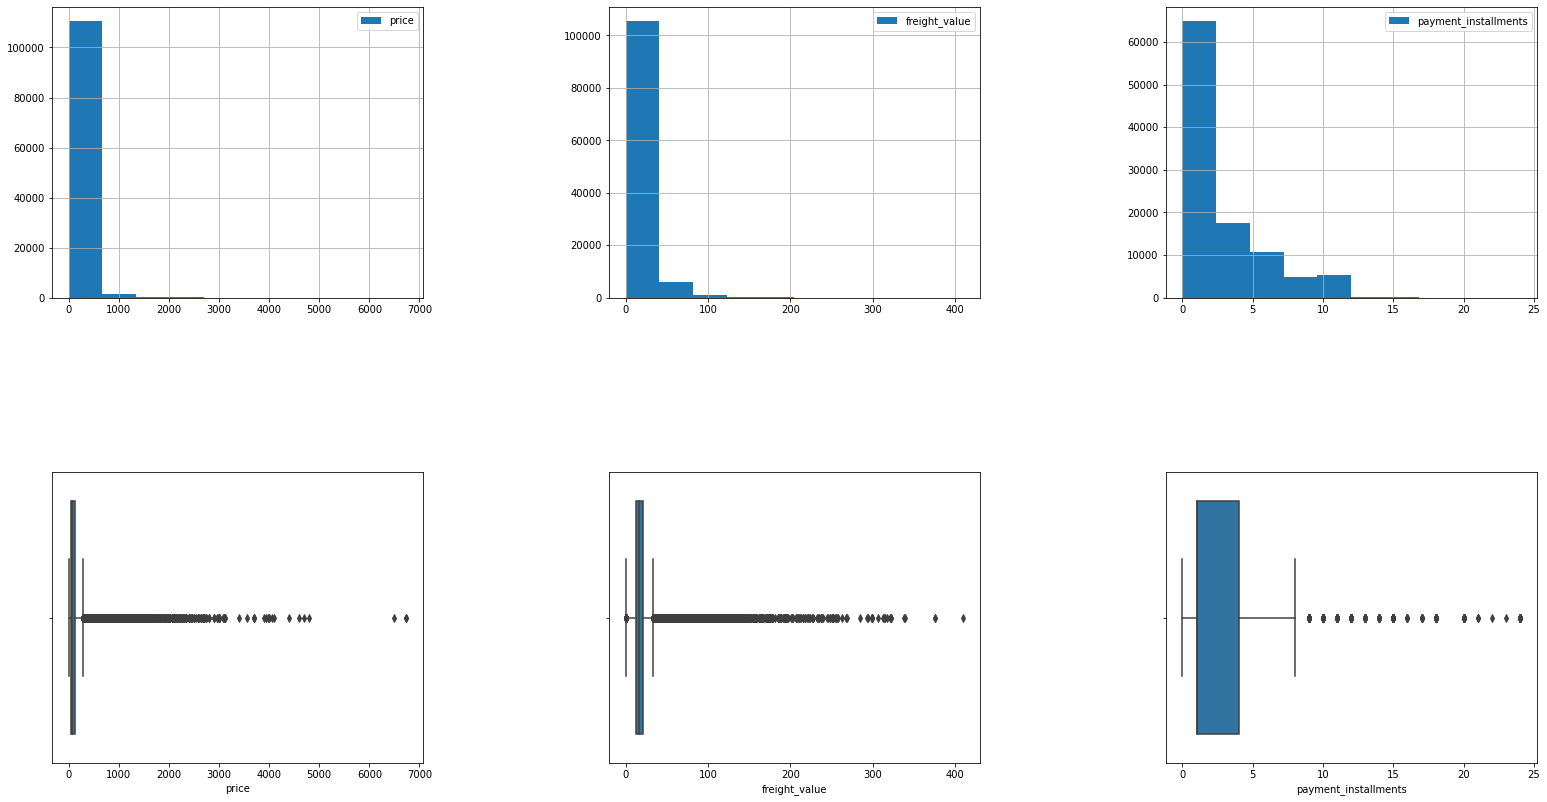

In [88]:
plt.figure(1,figsize=(15,15))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5, top = 0.9, wspace = 0.5, hspace = 0.6)

plt.subplot(2,3,1)
olist_order_items['price'].hist(legend = 'price')

plt.subplot(2,3,2)
olist_order_items['freight_value'].hist(legend = 'freight_value')

plt.subplot(2,3,3)
olist_order_payments['payment_installments'].hist(legend = 'payment_installments')

plt.subplot(2,3,4)
sns.boxplot(x = 'price', data = olist_order_items)

plt.subplot(2,3,5)
sns.boxplot(x = 'freight_value', data = olist_order_items)

plt.subplot(2,3,6)
sns.boxplot(x = 'payment_installments', data = olist_order_payments)

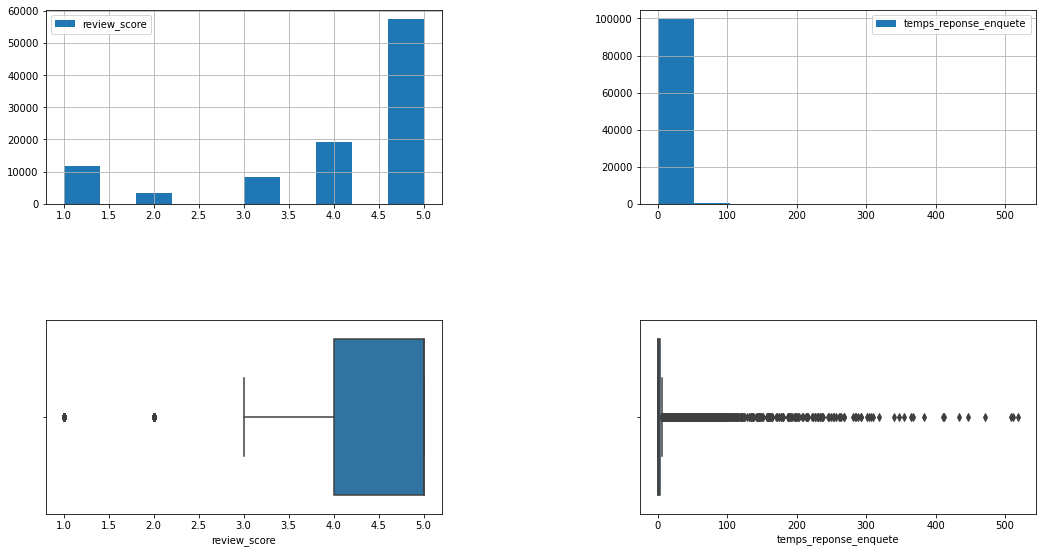

In [89]:
plt.figure(1,figsize=(10,10))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5, top = 0.9, wspace = 0.5, hspace = 0.6)

plt.subplot(2,2,1)
olist_order_reviews['review_score'].hist(legend = 'review_score')

plt.subplot(2,2,2)
olist_order_reviews['temps_reponse_enquete'].hist(legend = 'temps_reponse_enquete')

plt.subplot(2,2,3)
sns.boxplot(x = 'review_score', data = olist_order_reviews)

plt.subplot(2,2,4)
sns.boxplot(x = 'temps_reponse_enquete', data = olist_order_reviews)

In [90]:
nb_data = olist_order_items.shape[0]

In [91]:
olist_order_items_2[olist_order_items_2['payment_value'] != olist_order_items_2['somme']]

,order_id,price,freight_value,payment_value,somme,difference
134,005d9a5423d47281ac463a968b3936fb,99.97,45.28,145.26,145.25,0.01
165,00789ce015e7e5791c7914f32bb4fad4,154.00,14.83,190.81,168.83,21.98
525,016726239765c18f66826453f39c64e3,219.99,15.14,265.77,235.13,30.64
724,01e51b7c3025655646143d09b911e1d7,19.00,14.10,35.02,33.10,1.92
965,028aa7c930356788f861ed1b7f984819,39.90,17.63,62.94,57.53,5.41
...,...,...,...,...,...,...
99436,fdcca0e15a4d03e3fb89fb14664a3744,NaN,NaN,29.59,0.00,29.59
99437,fddbd183387b5c9bcbafbd0fe965301f,NaN,NaN,40.00,0.00,40.00
99438,fe87d4b944748f63ca5ed22cc55b6fb6,NaN,NaN,173.68,0.00,173.68
99439,feae5ecdf2cc16c1007741be785fe3cd,NaN,NaN,68.53,0.00,68.53


In [92]:
olist_order_items_2[olist_order_items_2['price'].isna()]

,order_id,price,freight_value,payment_value,somme,difference
98666,0010dedd556712d7bb69a19cb7bbd37a,NaN,NaN,111.12,0.0,111.12
98667,00a500bc03bc4ec968e574c2553bed4b,NaN,NaN,555.99,0.0,555.99
98668,00b1cb0320190ca0daa2c88b35206009,NaN,NaN,0.00,0.0,0.00
98669,00bca4adac549020c1273714d04d0208,NaN,NaN,111.30,0.0,111.30
98670,00d0ffd14774da775ac832ba8520510f,NaN,NaN,134.49,0.0,134.49
...,...,...,...,...,...,...
99436,fdcca0e15a4d03e3fb89fb14664a3744,NaN,NaN,29.59,0.0,29.59
99437,fddbd183387b5c9bcbafbd0fe965301f,NaN,NaN,40.00,0.0,40.00
99438,fe87d4b944748f63ca5ed22cc55b6fb6,NaN,NaN,173.68,0.0,173.68
99439,feae5ecdf2cc16c1007741be785fe3cd,NaN,NaN,68.53,0.0,68.53


In [93]:
olist_order_items_2.drop(olist_order_items_2[olist_order_items_2['price'].isna()].index, inplace=True)
olist_order_items_2.isnull().sum(axis = 0)

order_id         0
price            0
freight_value    0
payment_value    1
somme            0
difference       1
dtype: int64

In [94]:
dt = olist_order_items_2[olist_order_items_2['payment_value'] != olist_order_items_2['somme']]
dt

,order_id,price,freight_value,payment_value,somme,difference
134,005d9a5423d47281ac463a968b3936fb,99.97,45.28,145.26,145.25,0.01
165,00789ce015e7e5791c7914f32bb4fad4,154.00,14.83,190.81,168.83,21.98
525,016726239765c18f66826453f39c64e3,219.99,15.14,265.77,235.13,30.64
724,01e51b7c3025655646143d09b911e1d7,19.00,14.10,35.02,33.10,1.92
965,028aa7c930356788f861ed1b7f984819,39.90,17.63,62.94,57.53,5.41
...,...,...,...,...,...,...
97657,fd571ab12e8d263eaf309774eedfcfeb,890.70,58.00,948.69,948.70,0.01
97809,fdb034f444a32838124d8907e443d249,18.90,12.48,33.56,31.38,2.18
97993,fe35e99a6a5d4d036bf8167d364e0792,239.60,23.00,262.59,262.60,0.01
98220,fecb65750b4fe05b8257f650b2e114a2,199.80,16.96,216.75,216.76,0.01


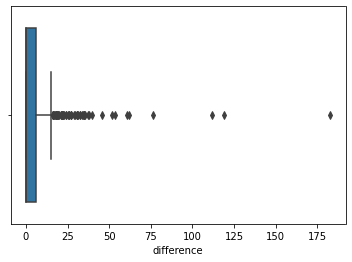

In [95]:
sns.boxplot(x = 'difference', data = dt)

In [96]:
dt[['price', 'freight_value', 'payment_value', 'somme', 'difference']].describe(include='all')

,price,freight_value,payment_value,somme,difference
count,577.000000,577.000000,576.000000,577.000000,576.000000
mean,206.136776,44.283362,255.589149,250.420139,5.680469
std,284.837976,53.479783,315.738232,314.914694,13.660976
min,9.990000,7.390000,16.380000,17.380000,0.010000
25%,55.000000,16.170000,80.877500,74.660000,0.010000
50%,125.800000,25.750000,163.935000,161.470000,0.020000
75%,244.500000,54.040000,297.910000,296.730000,6.217500
max,3099.750000,626.640000,3195.730000,3195.740000,182.810000


Je supprime les lignes avec une différence suppérieure à 0.02 dans le DataFrame olist_order_items

In [97]:
seuil = 10.0
liste_supprimer = list(olist_order_items_2[olist_order_items_2['difference'] > seuil]['order_id'])
olist_order_items = olist_order_items[olist_order_items['order_id'].isin(liste_supprimer) == False]

print(nb_data - olist_order_items.shape[0], 'lignes ont été supprimées.')

122 lignes ont été supprimées.


In [98]:
olist_customers['customer_city'] = olist_customers['customer_city'].str.lower()
olist_customers['customer_city'] = olist_customers['customer_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

olist_customers_2 = pd.merge(olist_customers, olist_geolocation_2, left_on =  ['customer_zip_code_prefix', 'customer_city',	'customer_state'], right_on = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], how = 'left')
olist_customers_2 = olist_customers_2.rename(columns = {'geolocation_lat' : 'customer_lat', 'geolocation_lng' : 'customer_lng'})

olist_customers_2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,campinas,SP,-22.975100,-47.142925
...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,3937,sao paulo,SP,-23.586003,-46.499638
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764,taboao da serra,SP,-23.615830,-46.768533
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115,fortaleza,CE,-3.734569,-38.510534
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120,canoas,RS,-29.949839,-51.168494


In [99]:
olist_sellers['seller_zip_code_prefix'] = olist_sellers['seller_zip_code_prefix'].astype(str)
olist_sellers['seller_city'] = olist_sellers['seller_city'].str.lower()
olist_sellers['seller_city'] = olist_sellers['seller_city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

olist_sellers_2 = pd.merge(olist_sellers, olist_geolocation_2, left_on =  ['seller_zip_code_prefix', 'seller_city',	'seller_state'], right_on = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], how = 'left')
olist_sellers_2 = olist_sellers_2.rename(columns = {'geolocation_lat' : 'seller_lat', 'geolocation_lng' : 'seller_lng'})
olist_sellers_2

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,seller_lat,seller_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844,mogi guacu,SP,-22.383077,-46.948817
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,12914,braganca paulista,SP,-22.964803,-46.534419
...,...,...,...,...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,87111,sarandi,PR,-23.448041,-51.869960
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,88137,palhoca,SC,-27.656421,-48.665840
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,4650,sao paulo,SP,-23.657851,-46.676925
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,96080,pelotas,RS,-31.751072,-52.323202


# Jointures des DataFrames utilisés

Text(0.5, 1.0, "Histogramme de la date d'achat")

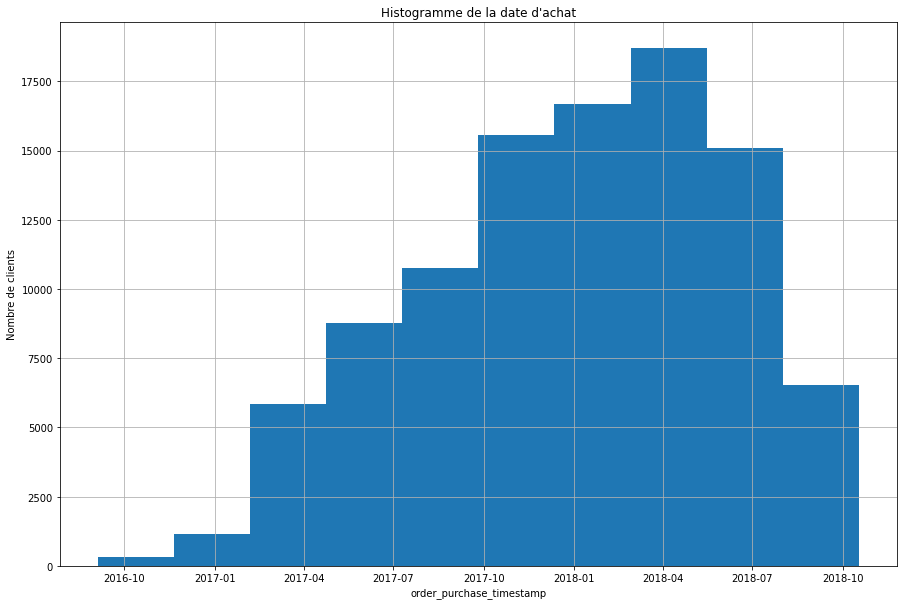

In [100]:
olist_orders['order_purchase_timestamp'] = olist_orders['order_purchase_timestamp'].astype('datetime64[D]')

fig = plt.figure(figsize=(15, 10))
olist_orders['order_purchase_timestamp'].hist()
plt.xlabel('order_purchase_timestamp')
plt.ylabel('Nombre de clients')
plt.title("Histogramme de la date d'achat")

In [101]:
print('Les données varient du', olist_orders['order_purchase_timestamp'].min(), 'au', olist_orders['order_purchase_timestamp'].max())

Les données varient du 2016-09-04 00:00:00 au 2018-10-17 00:00:00


In [102]:
## Sélection des variables utilisées

data = pd.merge(olist_customers_2[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_state', 'customer_lat', 'customer_lng']], 
                olist_orders[['order_id', 'customer_id', 'order_purchase_timestamp', 'statut_livraison', 'duree_livraison']], on = ['customer_id'], how = 'inner')
data = data.merge(olist_order_items[['order_id', 'price', 'product_id', 'order_item_id', 'freight_value', 'seller_id']], on = ['order_id'], how = 'inner')
data = data.merge(olist_products[['product_category_name_english', 'product_id', 'product_photos_qty', 'product_weight_g', 'volume_produit']], on = ['product_id'], how = 'inner')
data = data.merge(olist_order_reviews[['review_score', 'order_id', 'temps_reponse_enquete']], on = ['order_id'], how = 'inner')
data = data.merge(olist_order_payments[['order_id', 'payment_installments', 'payment_type_credit_card']], on = ['order_id'], how = 'inner')
data = data.merge(olist_sellers_2[['seller_zip_code_prefix', 'seller_state', 'seller_lat', 'seller_lng', 'seller_id']], on = ['seller_id'], how = 'inner')

data = data.sort_values('order_purchase_timestamp', ascending=False)
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,customer_lat,customer_lng,order_id,order_purchase_timestamp,statut_livraison,duree_livraison,price,product_id,order_item_id,freight_value,seller_id,product_category_name_english,product_photos_qty,product_weight_g,volume_produit,review_score,temps_reponse_enquete,payment_installments,payment_type_credit_card,seller_zip_code_prefix,seller_state,seller_lat,seller_lng
114469,4b7decb9b58e2569548b8b4c8e20e8d7,ff22e30958c13ffe219db7d711e8f564,2989,SP,-23.433762,-46.720958,54282e97f61c23b78330c15b154c867d,2018-09-03,Non livré,500.0,145.00,b98992ea80b467987a7fbb88e7f2076a,1,21.46,25be943a321c8938947bdaabca979a90,meuble,1.0,10400.0,34816.0,1,0,1,autre,9725,SP,-23.706316,-46.556956
101138,e450a297a7bc6839ceb0cf1a2377fa02,7a22d14aa3c3599238509ddca4b93b01,5863,SP,-23.676918,-46.766186,52018484704db3661b98ce838612b507,2018-08-29,Livré,1.0,63.90,777798445efd625458a90c13f3b3e6e7,1,9.20,5f2684dab12e59f83bef73ae57724e45,enfance,2.0,1500.0,11088.0,1,21,7,credit_card,5125,SP,-23.502723,-46.738728
38238,b8c19e70d00f6927388e4f31c923d785,0c6d7218d5f3fa14514fd29865269993,9625,SP,-23.661090,-46.566690,912859fef5a0bd5059b6d48fa79d121a,2018-08-29,Livré,1.0,169.80,9865c67a74684715521d1e70226cce0b,1,8.45,fa1c13f2614d7b5c4749cbc52fecda94,divers,1.0,290.0,3211.0,5,1,1,credit_card,13170,SP,-22.822137,-47.270335
84264,10a79ef2783cae3d8d678e85fde235ac,21dbe8eabd00b34492a939c540e2b1a7,2413,SP,-23.482940,-46.637025,d70442bc5e3cb7438da497cc6a210f80,2018-08-29,Livré,1.0,6.90,9a8706b8c060b16e5f0d2925f20bc35b,1,7.39,0be8ff43f22e456b4e0371b2245e4d01,loisirs,3.0,100.0,15625.0,5,2,1,credit_card,4461,SP,-23.691183,-46.679584
4191,898b7fee99c4e42170ab69ba59be0a8b,24ac2b4327e25baf39f2119e4228976a,13483,SP,-22.560755,-47.446494,35a972d7f8436f405b56e36add1a7140,2018-08-29,Livré,1.0,84.99,d04857e7b4b708ee8b8b9921163edba3,1,8.76,9f505651f4a6abe901a56cdc21508025,tech,2.0,450.0,1280.0,5,9,1,credit_card,4102,SP,-23.589847,-46.632614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30955,355077684019f7f60a031656bd7262b8,32ea3bdedab835c3aa6cb68ce66565ef,4106,SP,-23.581451,-46.635029,3b697a20d9e427646d92567910af6d57,2016-10-03,Livré,23.0,29.90,3ae08df6bcbfe23586dd431c40bddbb7,1,15.56,522620dcb18a6b31cd7bdf73665113a9,divers,3.0,300.0,4096.0,4,4,1,autre,85801,PR,-24.959184,-53.462644
86951,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,2975,SP,-23.478131,-46.711362,71303d7e93b399f5bcd537d124c0bcfa,2016-10-02,Non livré,500.0,100.00,d2998d7ced12f83f9b832f33cf6507b6,1,9.34,25e6ffe976bd75618accfe16cefcbd0d,enfance,1.0,500.0,5832.0,1,0,1,credit_card,5503,SP,-23.570212,-46.710840
113526,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,RS,-28.264640,-52.425421,e5fa5a7210941f7d56d0208e4e071d35,2016-09-05,Non livré,500.0,59.50,f3c2d01a84c947b078e32bbef0718962,1,15.56,a425f92c199eb576938df686728acd20,tech,1.0,700.0,1250.0,1,1,3,credit_card,81050,PR,-25.490559,-49.302027
61387,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,RR,2.813746,-60.701007,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04,Non livré,500.0,39.99,c1488892604e4ba5cff5b4eb4d595400,1,31.67,1554a68530182680ad5c8b042c3ab563,meuble,2.0,1400.0,5376.0,1,24,1,credit_card,37580,MG,-22.430218,-46.573405


In [103]:
## Suppression des doublons
data.drop_duplicates(keep = 'first', inplace=True)

In [104]:
data.isnull().sum(axis = 0)

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_state                      0
customer_lat                      350
customer_lng                      350
order_id                            0
order_purchase_timestamp            0
statut_livraison                    0
duree_livraison                     0
price                               0
product_id                          0
order_item_id                       0
freight_value                       0
seller_id                           0
product_category_name_english    1680
product_photos_qty               1655
product_weight_g                   19
volume_produit                     19
review_score                        0
temps_reponse_enquete               0
payment_installments                0
payment_type_credit_card            0
seller_zip_code_prefix              0
seller_state                        0
seller_lat                       2587
seller_lng  

In [105]:
data[data['product_category_name_english'].isna()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,customer_lat,customer_lng,order_id,order_purchase_timestamp,statut_livraison,duree_livraison,price,product_id,order_item_id,freight_value,seller_id,product_category_name_english,product_photos_qty,product_weight_g,volume_produit,review_score,temps_reponse_enquete,payment_installments,payment_type_credit_card,seller_zip_code_prefix,seller_state,seller_lat,seller_lng
115557,fa5e5ede73e8f02fe888b6f3bd44a714,4dff4725813168461eb3e5e9f807d66a,14490,SP,-20.079712,-47.424667,a73d469a8747dea1740e9545d1051002,2018-08-27,Livré,3.0,517.80,ae62bb0f95af63d64eae5f93dddea8d3,1,27.71,3296662b1331dea51e744505065ae889,NaN,1.0,10600.0,30400.0,5,3,1,autre,15805,SP,-21.122415,-48.963319
111112,b0a44e6002f9ff27862759d0d1992f4e,dc4b0942fb780633d44f4f73ff69dd92,2344,SP,-23.469312,-46.610305,e6f6345c50327507fe35965aa65c8e94,2018-08-27,Livré,3.0,29.99,fd85f34d70edf41fbea6a3269d183e00,1,7.47,caa9bc43a9fe8cf9c564ddd8a03cc4a6,NaN,NaN,163.0,9072.0,5,3,1,credit_card,12308,SP,-23.303917,-45.962652
59139,94530252be2e605952ea3e82461cfbad,11ccf36669e0483ac53abfeb566679b6,2022,SP,-23.504074,-46.637671,e53249d8b27242c64053f94e2af2b2ba,2018-08-26,Livré,2.0,59.90,b0645512783cc56c9510f08e90a40ede,1,7.68,8648b1e89e9b349e32d3741b30ec737e,NaN,NaN,300.0,2500.0,5,1,1,credit_card,12308,SP,-23.303917,-45.962652
52549,dbaf23b654a0bbedc2781c69f0c6f03c,2fc09b16746a702ba0aab85c6a9a7438,13256,SP,-23.009699,-46.854335,f2fc3e958c7943badc989a1f5db932b4,2018-08-22,Livré,5.0,12.99,6ab9d49c399f239bc88ea28c7568213f,1,7.39,5c853bb56f70f4d14218944bae111d7a,NaN,NaN,250.0,1408.0,5,1,1,credit_card,6715,SP,-23.610141,-46.876634
51468,21b75a343cc69ed545016d78d22bde39,4ecdb958c2b1b099ed5e56d9ca156773,22471,RJ,-22.967626,-43.203213,9c33774fba00c73b651903f988c71bb9,2018-08-20,Livré,10.0,249.90,f524a09994004b2dabb3d13cf1a041fb,1,42.73,0c8380b62e38e8a1e6adbeba7eb9688c,NaN,NaN,7150.0,36000.0,5,0,1,autre,37410,MG,-21.693371,-45.259769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88874,c64e943126adfabb1c2ae21b4bc1e650,d6d67261f2634cdf9ec293cd765c8479,7063,SP,-23.457164,-46.557135,29d99fdabd0cb6b4e9d82f2f38c04a5a,2017-01-25,Livré,5.0,99.00,fcde1899043318107d8f0ae043f69bc3,1,14.86,d66c305afaec317ebee552073a674429,NaN,NaN,400.0,2940.0,5,2,3,credit_card,33936,MG,-19.805005,-44.013321
42838,356e49e06716cab5d634234a371dba70,8416fd034dbaeface8a52c0819d3dffa,74870,GO,-16.728961,-49.218050,6219ece1f053a3ffa649340e87cd93d2,2017-01-20,Livré,13.0,349.99,aa2b29bee083c3eb3779f39fc09527b7,1,20.69,46dc3b2cc0980fb8ec44634e21d2718e,NaN,NaN,1500.0,30240.0,5,3,3,credit_card,22240,RJ,-22.935263,-43.187264
50321,c797ffdbae65b56c177d3c1368d03628,b77373c1be1866a704f28814c378b253,32400,MG,-20.018449,-44.067803,c022b7da8ab7a4a04bd561c8f765a14a,2017-01-17,Livré,8.0,169.00,d36c8237f8a0a889aa9d6ac7816097e3,1,25.00,80e6699fe29150b372a0c8a1ebf7dcc8,NaN,NaN,8750.0,48000.0,5,1,1,credit_card,83323,PR,-25.437226,-49.193966
82993,3a4ccb2c6fb972d301b8f9edfbf81fbd,ff822e5e1322cef6c211ad8a0591999e,25740,RJ,-22.374645,-43.129094,b533dea24ada4dc5c1a9041d25d7c812,2016-10-08,Livré,20.0,15.90,661e3bba6bdb874638367462b49ae590,1,14.52,23613d49c3ac2bd302259e55c06c050c,NaN,NaN,450.0,4500.0,5,2,1,autre,13660,SP,-21.866032,-47.478102


On n'utilise pas les lignes contenant des données manquantes.

In [106]:
#data.drop(data[data['product_category_name_english'].isna()].index, inplace=True)
data.dropna(how = 'any', inplace=True) 

In [107]:
data.isnull().sum(axis = 0)

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_state                   0
customer_lat                     0
customer_lng                     0
order_id                         0
order_purchase_timestamp         0
statut_livraison                 0
duree_livraison                  0
price                            0
product_id                       0
order_item_id                    0
freight_value                    0
seller_id                        0
product_category_name_english    0
product_photos_qty               0
product_weight_g                 0
volume_produit                   0
review_score                     0
temps_reponse_enquete            0
payment_installments             0
payment_type_credit_card         0
seller_zip_code_prefix           0
seller_state                     0
seller_lat                       0
seller_lng                       0
dtype: int64

In [108]:
data.reset_index(inplace=True, drop=True)
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,customer_lat,customer_lng,order_id,order_purchase_timestamp,statut_livraison,duree_livraison,price,product_id,order_item_id,freight_value,seller_id,product_category_name_english,product_photos_qty,product_weight_g,volume_produit,review_score,temps_reponse_enquete,payment_installments,payment_type_credit_card,seller_zip_code_prefix,seller_state,seller_lat,seller_lng
0,4b7decb9b58e2569548b8b4c8e20e8d7,ff22e30958c13ffe219db7d711e8f564,2989,SP,-23.433762,-46.720958,54282e97f61c23b78330c15b154c867d,2018-09-03,Non livré,500.0,145.00,b98992ea80b467987a7fbb88e7f2076a,1,21.46,25be943a321c8938947bdaabca979a90,meuble,1.0,10400.0,34816.0,1,0,1,autre,9725,SP,-23.706316,-46.556956
1,e450a297a7bc6839ceb0cf1a2377fa02,7a22d14aa3c3599238509ddca4b93b01,5863,SP,-23.676918,-46.766186,52018484704db3661b98ce838612b507,2018-08-29,Livré,1.0,63.90,777798445efd625458a90c13f3b3e6e7,1,9.20,5f2684dab12e59f83bef73ae57724e45,enfance,2.0,1500.0,11088.0,1,21,7,credit_card,5125,SP,-23.502723,-46.738728
2,b8c19e70d00f6927388e4f31c923d785,0c6d7218d5f3fa14514fd29865269993,9625,SP,-23.661090,-46.566690,912859fef5a0bd5059b6d48fa79d121a,2018-08-29,Livré,1.0,169.80,9865c67a74684715521d1e70226cce0b,1,8.45,fa1c13f2614d7b5c4749cbc52fecda94,divers,1.0,290.0,3211.0,5,1,1,credit_card,13170,SP,-22.822137,-47.270335
3,10a79ef2783cae3d8d678e85fde235ac,21dbe8eabd00b34492a939c540e2b1a7,2413,SP,-23.482940,-46.637025,d70442bc5e3cb7438da497cc6a210f80,2018-08-29,Livré,1.0,6.90,9a8706b8c060b16e5f0d2925f20bc35b,1,7.39,0be8ff43f22e456b4e0371b2245e4d01,loisirs,3.0,100.0,15625.0,5,2,1,credit_card,4461,SP,-23.691183,-46.679584
4,898b7fee99c4e42170ab69ba59be0a8b,24ac2b4327e25baf39f2119e4228976a,13483,SP,-22.560755,-47.446494,35a972d7f8436f405b56e36add1a7140,2018-08-29,Livré,1.0,84.99,d04857e7b4b708ee8b8b9921163edba3,1,8.76,9f505651f4a6abe901a56cdc21508025,tech,2.0,450.0,1280.0,5,9,1,credit_card,4102,SP,-23.589847,-46.632614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111145,355077684019f7f60a031656bd7262b8,32ea3bdedab835c3aa6cb68ce66565ef,4106,SP,-23.581451,-46.635029,3b697a20d9e427646d92567910af6d57,2016-10-03,Livré,23.0,29.90,3ae08df6bcbfe23586dd431c40bddbb7,1,15.56,522620dcb18a6b31cd7bdf73665113a9,divers,3.0,300.0,4096.0,4,4,1,autre,85801,PR,-24.959184,-53.462644
111146,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,2975,SP,-23.478131,-46.711362,71303d7e93b399f5bcd537d124c0bcfa,2016-10-02,Non livré,500.0,100.00,d2998d7ced12f83f9b832f33cf6507b6,1,9.34,25e6ffe976bd75618accfe16cefcbd0d,enfance,1.0,500.0,5832.0,1,0,1,credit_card,5503,SP,-23.570212,-46.710840
111147,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,RS,-28.264640,-52.425421,e5fa5a7210941f7d56d0208e4e071d35,2016-09-05,Non livré,500.0,59.50,f3c2d01a84c947b078e32bbef0718962,1,15.56,a425f92c199eb576938df686728acd20,tech,1.0,700.0,1250.0,1,1,3,credit_card,81050,PR,-25.490559,-49.302027
111148,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,RR,2.813746,-60.701007,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04,Non livré,500.0,39.99,c1488892604e4ba5cff5b4eb4d595400,1,31.67,1554a68530182680ad5c8b042c3ab563,meuble,2.0,1400.0,5376.0,1,24,1,credit_card,37580,MG,-22.430218,-46.573405


# Création des indicateurs pour la segmentation RFM

La segmentation la plus utilisée est la **RFM** qui repose sur 3 critères : La Récence, la Fréquence et le Montant.

* La **récence** correspond à la date du dernier achat.
* La **fréquence** : fréquence des achats sur une période de référence donnée.
* Le **montant** : somme du chiffre d’affaires des achats cumulés sur cette période.

In [109]:
## Client récent ie date et durée depuis le dernier achat

data1 = data[['order_purchase_timestamp', 'customer_unique_id']].groupby(['customer_unique_id'], as_index=False).max()
data1.rename(columns={'order_purchase_timestamp' : 'date_dernier_achat'}, inplace = True)

data1 = data1.merge(data[['order_purchase_timestamp', 'customer_unique_id']].groupby(['customer_unique_id'], as_index=False).min(), on = ['customer_unique_id'], how = 'outer')
data1.rename(columns={'order_purchase_timestamp' : 'date_premier_achat'}, inplace = True)

date_final = data['order_purchase_timestamp'].max() 
data1['nombre_jours'] = (pd.to_datetime(date_final) - pd.to_datetime(data1['date_dernier_achat'])).dt.days

In [110]:
## Fréquence d'achat ie nombre de commandes par client

data2 = data[['order_id', 'customer_unique_id']].drop_duplicates(keep='first').sort_index().reset_index(drop=True).groupby(['customer_unique_id'], as_index=False).size()
data2 = data2.rename(columns = {'size' : 'nombre_commande'})

data2['nombre_commande'].value_counts()

1     88966
2      2518
3       173
4        29
5         9
7         2
6         2
15        1
9         1
Name: nombre_commande, dtype: int64

In [111]:
data2.loc[data2['nombre_commande'] > 3, 'nombre_commande']=3
data2['nombre_commande'].value_counts()

1    88966
2     2518
3      217
Name: nombre_commande, dtype: int64

In [112]:
data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [113]:
## Montant moyen des commandes

data2 = data[['price', 'order_id', 'customer_unique_id']].groupby(['order_id', 'customer_unique_id'], as_index=False).sum()
data2 = data2[['customer_unique_id', 'price']].groupby(['customer_unique_id'], as_index=False).mean()
data2 = data2.rename(columns = {'price' : 'moyenne_prix_commande'})

data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [114]:
data1 = data1.dropna(how = 'any')

In [115]:
data1.isnull().sum(axis = 0)

customer_unique_id       0
date_dernier_achat       0
date_premier_achat       0
nombre_jours             0
nombre_commande          0
moyenne_prix_commande    0
dtype: int64

In [116]:
data1.drop_duplicates(keep = 'first', inplace=True)

# Création d'autres indicateurs

Il est possible de créer de nouveaux indicateurs pour améliorer la segmentation.

In [117]:
## Nombre total d'articles achetés par client

data2 = pd.DataFrame(data.groupby('customer_unique_id', as_index=False).size())
data2 = data2.rename(columns = {'size' : 'nombre_total_articles'})

data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [118]:
## Nombre moyen d'articles achetés par commande

data2 = data[['order_item_id', 'order_id', 'customer_unique_id']].groupby(['order_id', 'customer_unique_id'], as_index=False).max()
data2 = data2[['customer_unique_id', 'order_item_id']].groupby(['customer_unique_id'], as_index=False).mean()
data2 = data2.rename(columns = {'order_item_id' : 'moyenne_nb_articles_par_commande'})

data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [119]:
## Statut de la livraison de la dernière commande

data2 = data[['statut_livraison', 'customer_unique_id', 'order_purchase_timestamp']]
data2 = data2.sort_values('order_purchase_timestamp', ascending=False).drop_duplicates('customer_unique_id', keep='first').sort_index().reset_index(drop=True)
data2.drop(['order_purchase_timestamp'], axis = 1, inplace = True)

data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [120]:
## Proportion des frais de transport sur le prix total

data2 = data[['price', 'freight_value', 'order_id', 'customer_unique_id']].groupby(['order_id', 'customer_unique_id'], as_index=False).sum()
data2['freight_value_pourcentage'] = data2['freight_value']*100/(data2['price'] + data2['freight_value'])

data2 = data2[['customer_unique_id', 'freight_value_pourcentage']].groupby(['customer_unique_id'], as_index=False).mean()

data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [121]:
## Variation du prix des articles par client

data1 = data1.merge(data[['price', 'customer_unique_id']].groupby(['customer_unique_id'], as_index=False).max(), on = ['customer_unique_id'], how = 'outer')
data1.rename(columns={'price' : 'prix_max_article'}, inplace = True)

data1 = data1.merge(data[['price', 'customer_unique_id']].groupby(['customer_unique_id'], as_index=False).min(), on = ['customer_unique_id'], how = 'outer')
data1.rename(columns={'price' : 'prix_min_article'}, inplace = True)

data1 = data1.merge(data[['price', 'customer_unique_id']].groupby(['customer_unique_id'], as_index=False).mean(), on = ['customer_unique_id'], how = 'outer')
data1.rename(columns={'price' : 'prix_moyen_article'}, inplace = True)

In [122]:
## Note du client et Durée de réponse à l'enquête de satisfaction

data2 = data[['review_score', 'temps_reponse_enquete', 'customer_unique_id', 'order_id']].drop_duplicates(keep='first').sort_index().reset_index(drop=True).groupby(['customer_unique_id'], as_index=False).mean()

data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [123]:
## Durée de livraison

data2 = data[['duree_livraison', 'customer_unique_id']].groupby(['customer_unique_id'], as_index=False).mean()
data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

## Data depuis le premier achat
data1['nombre_jours_1e_achat'] = (pd.to_datetime(date_final) - pd.to_datetime(data1['date_premier_achat'])).dt.days

In [124]:
## Informations sur les articles

data2 = data[['product_photos_qty','product_weight_g','volume_produit', 'order_id', 'customer_unique_id']].groupby(['order_id', 'customer_unique_id'], as_index=False).mean()
data2 = data2[['product_photos_qty','product_weight_g','volume_produit', 'customer_unique_id']].groupby(['customer_unique_id'], as_index=False).mean()
data2 = data2.rename(columns = {'product_photos_qty' : 'product_photos_qty_moyen', 'product_weight_g' : 'product_weight_g_moyen', 'volume_produit' : 'volume_produit_moyen'})

data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [125]:
import itertools
import operator

def mode(L):
  SL = sorted((x, i) for i, x in enumerate(L))
  groups = itertools.groupby(SL, key=operator.itemgetter(0))
  def _auxfun(g):
    item, iterable = g
    count = 0
    min_index = len(L)
    for _, where in iterable:
      count += 1
      min_index = min(min_index, where)
    return count, -min_index
  return max(groups, key=_auxfun)[0]

In [126]:
## Emplacement géographique du client

data1 = data1.merge(data[['customer_zip_code_prefix', 'customer_state', 'customer_unique_id', 'order_purchase_timestamp']].sort_values('order_purchase_timestamp', ascending=False).drop_duplicates('customer_unique_id', keep='first').sort_index().reset_index(drop=True))

## Emplacement géographique du vendeur

data2 = data[['seller_state','order_id', 'customer_unique_id', 'order_purchase_timestamp']].drop_duplicates(keep='first').sort_index().reset_index(drop=True).sort_values('order_purchase_timestamp', ascending=False).groupby(['customer_unique_id'])['seller_state'].apply(list).reset_index(name='seller_state_liste')
data2['seller_state_mode'] = data2['seller_state_liste'].apply(mode)
data1 = data1.merge(data2[['customer_unique_id', 'seller_state_mode']], on = ['customer_unique_id'], how = 'outer')

data2 = data[['seller_zip_code_prefix','order_id', 'customer_unique_id', 'order_purchase_timestamp']].drop_duplicates(keep='first').sort_index().reset_index(drop=True).sort_values('order_purchase_timestamp', ascending=False).groupby(['customer_unique_id'])['seller_zip_code_prefix'].apply(list).reset_index(name='seller_zip_code_prefix_liste')
data2['seller_zip_code_mode'] = data2['seller_zip_code_prefix_liste'].apply(mode)
data1 = data1.merge(data2[['customer_unique_id', 'seller_zip_code_mode']], on = ['customer_unique_id'], how = 'outer')

## Achat local et international

data['emplacement_vendeur'] = np.where(data['seller_state'] == data['customer_state'], 'Local', 'Non local')

data2 = data[['emplacement_vendeur','order_id', 'customer_unique_id', 'order_purchase_timestamp']].drop_duplicates(keep='first').sort_index().reset_index(drop=True).sort_values('order_purchase_timestamp', ascending=False).groupby(['customer_unique_id'])['emplacement_vendeur'].apply(list).reset_index(name='emplacement_vendeur_liste')
data2['emplacement_vendeur_mode'] = data2['emplacement_vendeur_liste'].apply(mode)

data1 = data1.merge(data2[['customer_unique_id', 'emplacement_vendeur_mode']], on = ['customer_unique_id'], how = 'outer')

## Distance client-vendeur

data['distance_client_vendeur'] = ((data['customer_lat'] - data['seller_lat'])**2 + (data['customer_lng'] - data['seller_lng'])**2)**(0.5)
data2 = data[['distance_client_vendeur', 'order_id', 'customer_unique_id']].groupby(['order_id', 'customer_unique_id'], as_index=False).mean()

data2 = data2[['customer_unique_id', 'distance_client_vendeur']].groupby(['customer_unique_id'], as_index=False).mean()

data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [127]:
## Type de paiements

data2 = data[['payment_type_credit_card','order_id', 'customer_unique_id', 'order_purchase_timestamp']].drop_duplicates(keep='first').sort_index().reset_index(drop=True).sort_values('order_purchase_timestamp', ascending=False).groupby(['customer_unique_id'])['payment_type_credit_card'].apply(list).reset_index(name='payment_type_credit_card_liste')
data2['payment_type_credit_card_mode'] = data2['payment_type_credit_card_liste'].apply(mode)

data1 = data1.merge(data2[['customer_unique_id', 'payment_type_credit_card_mode']], on = ['customer_unique_id'], how = 'outer')

## Nombre de versements

data2 = data[['order_id', 'customer_unique_id', 'payment_installments']].groupby(['order_id', 'customer_unique_id'], as_index=False).mean()
data2 = data2[['customer_unique_id', 'payment_installments']].groupby(['customer_unique_id'], as_index=False).mean().round()
data2 = data2.rename(columns = {'payment_installments' : 'nb_versements_moyen'})

data1 = data1.merge(data2, on = ['customer_unique_id'], how = 'outer')

In [128]:
## Catégorie des articles

data2 = data[['product_category_name_english','order_id', 'customer_unique_id', 'order_purchase_timestamp']].drop_duplicates(keep='first').sort_index().reset_index(drop=True).sort_values('order_purchase_timestamp', ascending=False).groupby(['customer_unique_id'])['product_category_name_english'].apply(list).reset_index(name='product_category_name_english_liste')
data2['product_category_name_english_mode'] = data2['product_category_name_english_liste'].apply(mode)

data1 = data1.merge(data2[['customer_unique_id', 'product_category_name_english_mode']], on = ['customer_unique_id'], how = 'outer')

In [129]:
data1

,customer_unique_id,date_dernier_achat,date_premier_achat,nombre_jours,nombre_commande,moyenne_prix_commande,nombre_total_articles,moyenne_nb_articles_par_commande,statut_livraison,freight_value_pourcentage,prix_max_article,prix_min_article,prix_moyen_article,review_score,temps_reponse_enquete,duree_livraison,nombre_jours_1e_achat,product_photos_qty_moyen,product_weight_g_moyen,volume_produit_moyen,customer_zip_code_prefix,customer_state,order_purchase_timestamp,seller_state_mode,seller_zip_code_mode,emplacement_vendeur_mode,distance_client_vendeur,payment_type_credit_card_mode,nb_versements_moyen,product_category_name_english_mode
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-05-10,116,1,129.90,1,1.0,Livré,8.456660,129.90,129.90,129.90,5.0,4.0,6.0,116,1.0,1500.0,7616.0,7787,SP,2018-05-10,SP,13405,Local,1.046633,credit_card,8.0,meuble
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-05-07,119,1,18.90,1,1.0,Livré,30.489150,18.90,18.90,18.90,4.0,0.0,3.0,119,1.0,375.0,5148.0,6053,SP,2018-05-07,SP,2215,Local,0.215391,credit_card,1.0,sante_et_beaute
2,0000f46a3911fa3c0805444483337064,2017-03-10,2017-03-10,542,1,69.00,1,1.0,Livré,19.972164,69.00,69.00,69.00,3.0,1.0,26.0,542,3.0,1500.0,43750.0,88115,SC,2017-03-10,SP,13232,Non local,4.717804,credit_card,8.0,accessoires
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,2017-10-12,326,1,25.99,1,1.0,Livré,40.417240,25.99,25.99,25.99,4.0,1.0,20.0,326,5.0,150.0,1045.0,66812,PA,2017-10-12,SP,3569,Non local,22.320099,credit_card,4.0,tech
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,2017-11-14,293,1,180.00,1,1.0,Livré,8.578394,180.00,180.00,180.00,5.0,4.0,13.0,293,3.0,6050.0,528.0,18040,SP,2017-11-14,SP,12327,Local,1.511542,credit_card,6.0,tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91696,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,2017-06-08,452,1,1570.00,2,2.0,Livré,24.059939,890.00,680.00,785.00,5.0,4.0,28.0,452,1.0,30000.0,251625.0,55250,PE,2017-06-08,SP,3908,Non local,18.180999,credit_card,10.0,sante_et_beaute
91697,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,2017-12-10,267,1,64.89,1,1.0,Livré,23.279735,64.89,64.89,64.89,4.0,5.0,30.0,267,2.0,1720.0,32076.0,44054,BA,2017-12-10,SP,18500,Non local,14.005715,credit_card,1.0,enfance
91698,ffff371b4d645b6ecea244b27531430a,2017-02-07,2017-02-07,573,1,89.90,1,1.0,Livré,20.060466,89.90,89.90,89.90,5.0,2.0,15.0,573,5.0,600.0,3315.0,78552,MT,2017-02-07,MG,30550,Non local,14.092964,credit_card,1.0,divers
91699,ffff5962728ec6157033ef9805bacc48,2018-05-02,2018-05-02,124,1,115.00,1,1.0,Livré,13.980103,115.00,115.00,115.00,5.0,2.0,12.0,124,3.0,444.0,4480.0,29460,ES,2018-05-02,SP,14050,Non local,6.151068,credit_card,5.0,divers


In [130]:
len(data1['customer_unique_id'].unique())

91701

In [131]:
data1.isnull().sum(axis = 0)

customer_unique_id                    0
date_dernier_achat                    0
date_premier_achat                    0
nombre_jours                          0
nombre_commande                       0
moyenne_prix_commande                 0
nombre_total_articles                 0
moyenne_nb_articles_par_commande      0
statut_livraison                      0
freight_value_pourcentage             0
prix_max_article                      0
prix_min_article                      0
prix_moyen_article                    0
review_score                          0
temps_reponse_enquete                 0
duree_livraison                       0
nombre_jours_1e_achat                 0
product_photos_qty_moyen              0
product_weight_g_moyen                0
volume_produit_moyen                  0
customer_zip_code_prefix              0
customer_state                        0
order_purchase_timestamp              0
seller_state_mode                     0
seller_zip_code_mode                  0


In [132]:
data1[data1.duplicated('customer_unique_id')]

,customer_unique_id,date_dernier_achat,date_premier_achat,nombre_jours,nombre_commande,moyenne_prix_commande,nombre_total_articles,moyenne_nb_articles_par_commande,statut_livraison,freight_value_pourcentage,prix_max_article,prix_min_article,prix_moyen_article,review_score,temps_reponse_enquete,duree_livraison,nombre_jours_1e_achat,product_photos_qty_moyen,product_weight_g_moyen,volume_produit_moyen,customer_zip_code_prefix,customer_state,order_purchase_timestamp,seller_state_mode,seller_zip_code_mode,emplacement_vendeur_mode,distance_client_vendeur,payment_type_credit_card_mode,nb_versements_moyen,product_category_name_english_mode


In [133]:
data1.dtypes

customer_unique_id                            object
date_dernier_achat                    datetime64[ns]
date_premier_achat                    datetime64[ns]
nombre_jours                                   int64
nombre_commande                                int64
moyenne_prix_commande                        float64
nombre_total_articles                          int64
moyenne_nb_articles_par_commande             float64
statut_livraison                              object
freight_value_pourcentage                    float64
prix_max_article                             float64
prix_min_article                             float64
prix_moyen_article                           float64
review_score                                 float64
temps_reponse_enquete                        float64
duree_livraison                              float64
nombre_jours_1e_achat                          int64
product_photos_qty_moyen                     float64
product_weight_g_moyen                       f

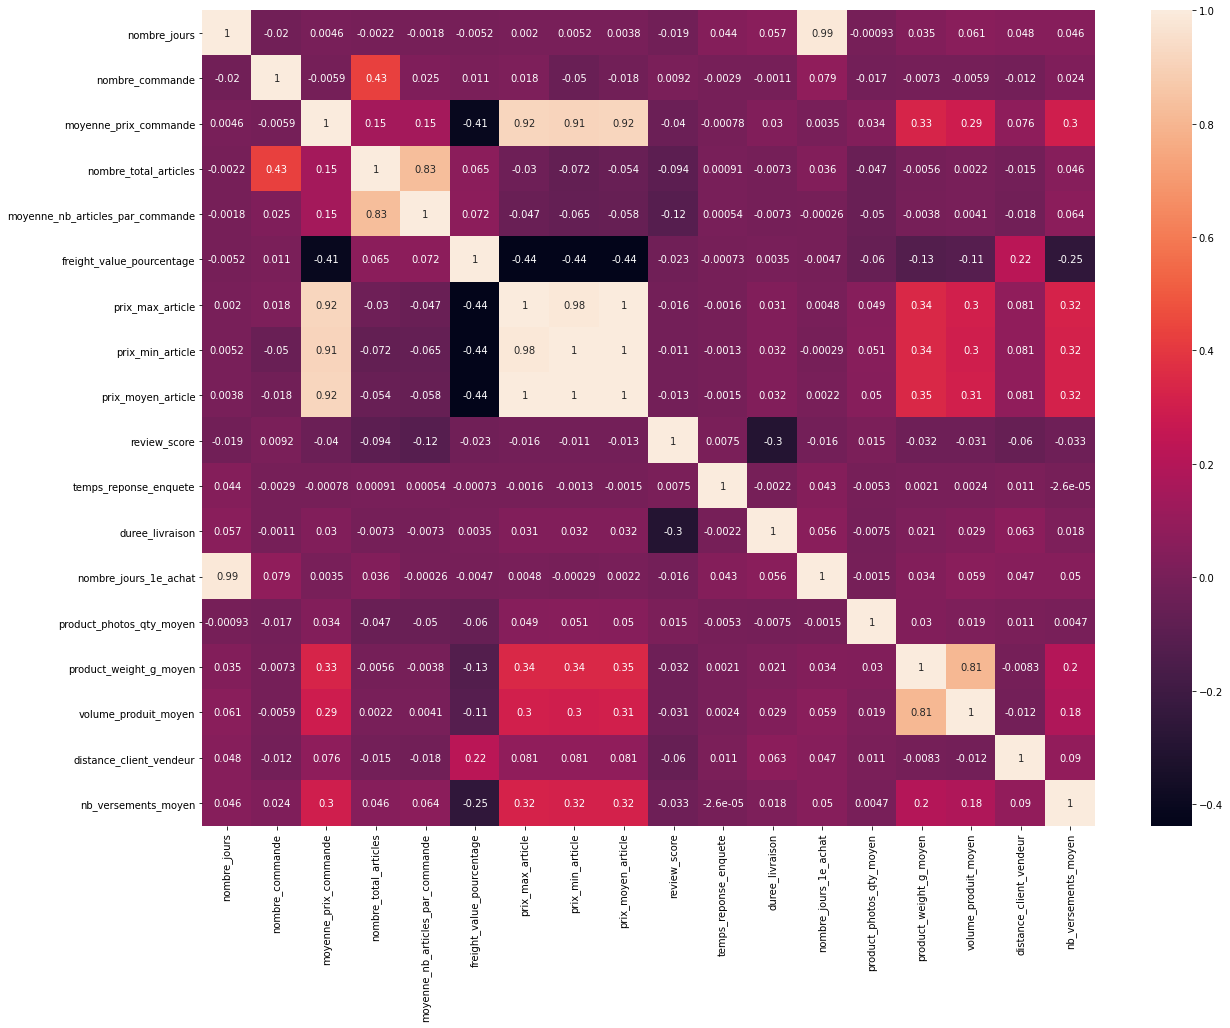

In [134]:
var_quanti = ['nombre_jours', 'nombre_commande', 'moyenne_prix_commande', 'nombre_total_articles', 'moyenne_nb_articles_par_commande', 'freight_value_pourcentage', 'prix_max_article', 'prix_min_article', 'prix_moyen_article', 'review_score', 'temps_reponse_enquete', 'duree_livraison', 'nombre_jours_1e_achat', 'product_photos_qty_moyen', 'product_weight_g_moyen', 'volume_produit_moyen', 'distance_client_vendeur', 'nb_versements_moyen']
var_quali = ['statut_livraison', 'customer_zip_code_prefix', 'customer_state', 'seller_zip_code_mode', 'seller_state_mode', 'emplacement_vendeur_mode', 'payment_type_credit_card_mode', 'product_category_name_english_mode']

plt.figure(figsize = (20, 15))
corrMatrix = data1[var_quanti].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

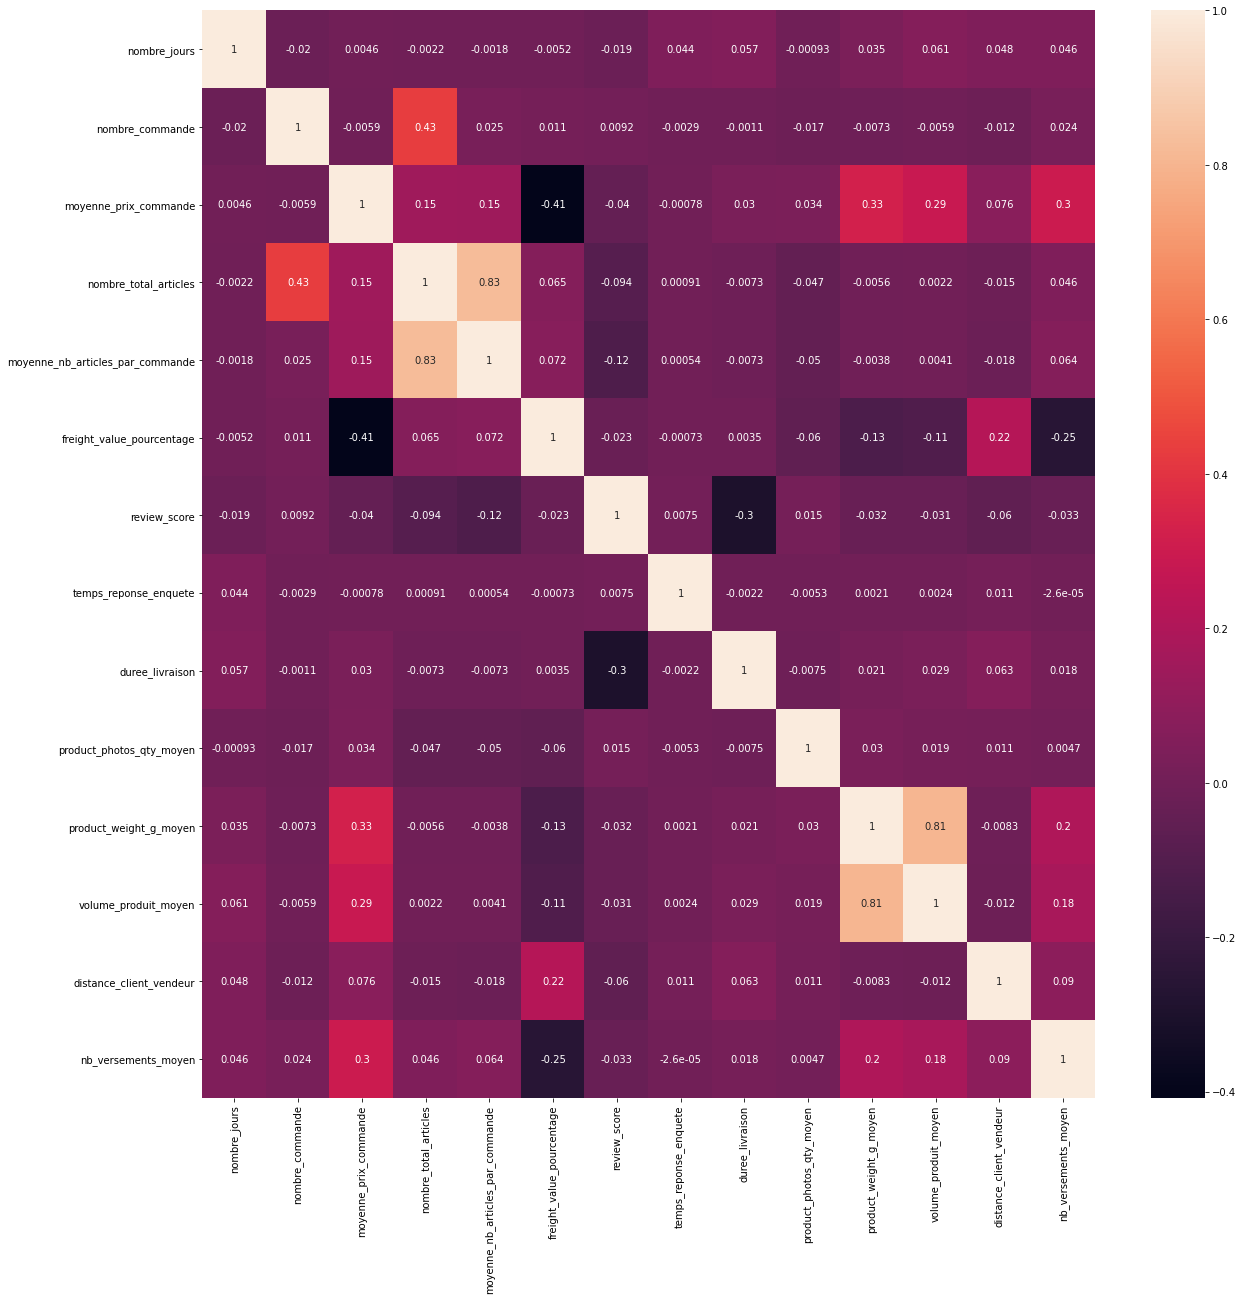

In [135]:
data_final = data1.copy()
data_final.drop(['nombre_jours_1e_achat', 'order_purchase_timestamp', 'prix_max_article', 'prix_min_article', 'prix_moyen_article', 'customer_zip_code_prefix', 'customer_state', 'seller_zip_code_mode', 'seller_state_mode'], axis = 1, inplace = True)
												
var_quanti = ['nombre_jours', 'nombre_commande', 'moyenne_prix_commande', 'nombre_total_articles', 'moyenne_nb_articles_par_commande', 'freight_value_pourcentage', 'review_score', 'temps_reponse_enquete', 'duree_livraison', 'product_photos_qty_moyen', 'product_weight_g_moyen', 'volume_produit_moyen', 'distance_client_vendeur', 'nb_versements_moyen']

plt.figure(figsize = (20, 20))
corrMatrix = data_final[var_quanti].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Exportation du jeu de données

In [96]:
data_final

,customer_unique_id,date_dernier_achat,date_premier_achat,nombre_jours,nombre_commande,moyenne_prix_commande,nombre_total_articles,moyenne_nb_articles_par_commande,statut_livraison,freight_value_pourcentage,review_score,temps_reponse_enquete,duree_livraison,product_photos_qty_moyen,product_weight_g_moyen,volume_produit_moyen,emplacement_vendeur_mode,distance_client_vendeur,payment_type_credit_card_mode,nb_versements_moyen,product_category_name_english_mode
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,2018-05-10,116,1,129.90,1,1.0,Livré,8.456660,5.0,4.0,6.0,1.0,1500.0,7616.0,Local,1.046633,credit_card,8.0,meuble
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-05-07,119,1,18.90,1,1.0,Livré,30.489150,4.0,0.0,3.0,1.0,375.0,5148.0,Local,0.215391,credit_card,1.0,sante_et_beaute
2,0000f46a3911fa3c0805444483337064,2017-03-10,2017-03-10,542,1,69.00,1,1.0,Livré,19.972164,3.0,1.0,26.0,3.0,1500.0,43750.0,Non local,4.717804,credit_card,8.0,accessoires
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,2017-10-12,326,1,25.99,1,1.0,Livré,40.417240,4.0,1.0,20.0,5.0,150.0,1045.0,Non local,22.320099,credit_card,4.0,tech
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,2017-11-14,293,1,180.00,1,1.0,Livré,8.578394,5.0,4.0,13.0,3.0,6050.0,528.0,Local,1.511542,credit_card,6.0,tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91696,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,2017-06-08,452,1,1570.00,2,2.0,Livré,24.059939,5.0,4.0,28.0,1.0,30000.0,251625.0,Non local,18.180999,credit_card,10.0,sante_et_beaute
91697,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,2017-12-10,267,1,64.89,1,1.0,Livré,23.279735,4.0,5.0,30.0,2.0,1720.0,32076.0,Non local,14.005715,credit_card,1.0,enfance
91698,ffff371b4d645b6ecea244b27531430a,2017-02-07,2017-02-07,573,1,89.90,1,1.0,Livré,20.060466,5.0,2.0,15.0,5.0,600.0,3315.0,Non local,14.092964,credit_card,1.0,divers
91699,ffff5962728ec6157033ef9805bacc48,2018-05-02,2018-05-02,124,1,115.00,1,1.0,Livré,13.980103,5.0,2.0,12.0,3.0,444.0,4480.0,Non local,6.151068,credit_card,5.0,divers


In [99]:
print("Le DataFrame est composé de", data_final.shape[0], "lignes et de", data_final.shape[1], "colonnes.")

Le DataFrame est composé de 91701 lignes et de 21 colonnes.


In [100]:
## A partir de Google Colab
from google.colab import files

data_final.to_csv('data_segmentation.csv', sep = ',', index=False)
files.download('data_segmentation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploration des données du DataFrame data1

In [ ]:
data1.info()

In [171]:
var_quanti = ['nombre_jours', 'nombre_commande', 'moyenne_prix_commande', 'nombre_total_articles', 'moyenne_nb_articles_par_commande', 'freight_value_pourcentage', 'prix_max_article', 'prix_min_article', 'prix_moyen_article', 'review_score', 'temps_reponse_enquete', 'duree_livraison', 'nombre_jours_1e_achat', 'product_photos_qty_moyen', 'product_weight_g_moyen', 'volume_produit_moyen', 'distance_client_vendeur', 'nb_versements_moyen']

var_quali = ['statut_livraison', 'customer_state', 'seller_state_mode', 'emplacement_vendeur_mode', 'payment_type_credit_card_mode', 'product_category_name_english_mode']

In [166]:
data1[var_quali].describe(include='all')

,statut_livraison,customer_zip_code_prefix,customer_state,seller_zip_code_mode,seller_state_mode,emplacement_vendeur_mode,payment_type_credit_card_mode,product_category_name_english_mode
count,91701,91701,91701,91701,91701,91701,91701,91701
unique,2,14678,27,2114,22,2,2,12
top,Livré,22790,SP,14940,SP,Non local,credit_card,meuble
freq,89718,127,38535,6134,64640,58762,69574,16631


In [167]:
data1[var_quanti].describe(include='all')

,nombre_jours,nombre_commande,moyenne_prix_commande,nombre_total_articles,moyenne_nb_articles_par_commande,freight_value_pourcentage,prix_max_article,prix_min_article,prix_moyen_article,review_score,temps_reponse_enquete,duree_livraison,nombre_jours_1e_achat,product_photos_qty_moyen,product_weight_g_moyen,volume_produit_moyen,distance_client_vendeur,nb_versements_moyen
count,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000,91701.000000
mean,243.055714,1.032192,141.810262,1.212091,1.139137,20.869992,128.322999,124.787787,126.456452,4.087545,2.575636,23.082666,245.648499,2.247530,2118.491580,15347.076399,5.604827,2.903763
std,153.137039,0.189442,221.328911,0.679342,0.527778,12.504845,193.501673,190.878332,191.369219,1.337807,9.706182,71.199458,153.640817,1.732203,3747.299767,23422.548237,5.432682,2.675744
min,0.000000,1.000000,0.850000,1.000000,1.000000,0.000000,0.850000,0.850000,0.850000,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,168.000000,0.000000,0.000000
25%,119.000000,1.000000,47.650000,1.000000,1.000000,11.696017,43.490000,39.990000,42.900000,4.000000,1.000000,7.000000,121.000000,1.000000,300.000000,2816.000000,1.774151,1.000000
50%,223.000000,1.000000,89.000000,1.000000,1.000000,18.329340,79.900000,77.900000,79.000000,5.000000,1.000000,10.000000,226.000000,2.000000,700.000000,6600.000000,4.098120,2.000000
75%,352.000000,1.000000,152.450000,1.000000,1.000000,27.472274,140.000000,139.000000,139.900000,5.000000,3.000000,16.000000,356.000000,3.000000,1850.000000,18750.000000,7.447600,4.000000
max,729.000000,3.000000,13440.000000,24.000000,21.000000,95.545073,6735.000000,6735.000000,6735.000000,5.000000,518.000000,500.000000,729.000000,20.000000,40425.000000,294000.000000,88.595960,24.000000


## Définition des fonctions

### Analyse univariée d'une variable quantitative

In [137]:
## Encadrement théorique de la moyenne et de la variance théorique ie intervalle de confiance à 95%

def encadrement_moy_var_theo_quanti(data1, c):
  xbar = np.mean(data1[c])
  sprime = np.std(data1[c], ddof=1)
  n_data1 = len(data1)
  sprime2 = np.var(data1[c], ddof=1)
  alpha = 0.05
  
  icinf=xbar-st.t.ppf(1-alpha/2,n_data1-1)*sprime/math.sqrt(n_data1)
  icsup=xbar+st.t.ppf(1-alpha/2,n_data1-1)*sprime/math.sqrt(n_data1)
  print("La moyenne théorique de", c, "est comprise entre", round(icinf,2), "et", round(icsup,2))
  
  icinf = (n_data1-1)*sprime2/st.chi2.ppf(1-alpha/2,n_data1-1)
  icsup = (n_data1-1)*sprime2/st.chi2.ppf(alpha/2,n_data1-1)
  print("La variance théorique de", c, "est comprise entre", round(icinf,2), "et", round(icsup,2))

In [138]:
def analyses_univariees_quanti(data1, var):
  print('Moyenne de', var, ':', data1[var].mean())
  print('Variance de', var, ': ', data1[var].var(ddof=0))
  encadrement_moy_var_theo_quanti(data1, var)
  print('Médiane de', var, ':', data1[var].median())
  print('Mode de', var, ': ', data1[var].mode())
  print('Ecart-type de', var, ':', data1[var].std(ddof=0))
  print('Skewness de', var, ':', data1[var].skew())
  print('Kurtosis de', var, ':', data1[var].kurtosis())
  print('Boxplot de', var, ':')
  sns.set_theme(style="whitegrid")
  ax = sns.boxplot(x=data1[var])  
  plt.show()

In [139]:
def indice_de_gini(data1, var):
  dep = data1[var].dropna()
  n = len(dep)
  lorenz = np.cumsum(np.sort(dep)) / dep.sum()
  lorenz = np.append([0],lorenz)
  plt.axes().axis('equal')
  xaxis = np.linspace(0-1/n,1+1/n,n+1)
  plt.plot(xaxis,lorenz,drawstyle='steps-post')
  plt.plot([0,1], [0,1], color='r', alpha=0.5)
  plt.axis([-0.2, 1, -0.1, 1.1])
  plt.title('Courbe de Lorenz de ' + var)
  plt.show()
  
  AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
  S = 0.5 - AUC
  gini = 2*S
  print('Indice de Gini de', var, 'est :', gini)

In [140]:
def distibution(data, var):
  xbar=data[var].mean()
  plt.rcParams["figure.figsize"] = (20, 8)
  sns.distplot(data[var], kde_kws={"color": "k", "lw": 2, "label": "KDE"}).set_title('Plot et distribution de ' + var)
  plt.axvline(xbar, color='r', linewidth=2)
  plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

### Analyse univariée d'une variable qualitative

In [141]:
## Pour une variable qualitative

def analyses_univariees_quali(data, var):
  ## Tableau de fréquence
  d = pd.DataFrame(data[var].value_counts(normalize=True))
  print(d)
  ## Diagramme en secteurs
  plt.rcParams["figure.figsize"] = (5, 5)
  data[var].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
  plt.axis('equal')
  plt.title('Diagramme en secteurs de ' + var)
  plt.ylabel('')
  labels = data[var].index 
  plt.legend(labels, loc = 'upper right')
  plt.show()

In [142]:
## Histogramme
def histo_quali(data, var):
  plt.rcParams["figure.figsize"] = (20, 10)
  sns.set(style="white", rc={"axes.grid":True})
  ax = sns.countplot(x=var, data=data, saturation = 1)
  total = float(len(data)) 
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}'.format(height/total),ha="center") 
  ax.set_title('Histogramme de ' + var)
  ax = ax.set(xlabel=var, ylabel='Nombre produits')
  plt.show()

### Analyse bivariée entre 2 variables quantitatives

In [143]:
## Diagramme de dispersion entre 2 variables quantitatives

def diagramme_dipersion(X, Y, data):
  plt. figure(figsize = (10, 10))
  plt.plot(data[X],data[Y],'o',alpha=0.5)
  plt.xlabel(X)
  plt.ylabel(Y)
  plt.title("Diagramme de dispersion")
  plt.show()

In [144]:
## Analyse bivariée entre 2 variables quantitatives : Régression linéaire

def coeff_stat(X, Y, data):
  print("Corrélation de Pearson :", st.pearsonr(data[X],data[Y])[0])
  np.cov(data[X],data[Y],ddof=0) # matrice de corrélation  
  sns.jointplot(x = X, y = Y, data = data, kind = "reg")
  plt.suptitle("Diagramme de dispersion et droite de régression linéaire")

### Analyse bivariée entre 1 variable quantitative et 1 variable qualitative

In [145]:
## Boxplot d'une variable quantitative en fonction des modalités de la variable qualitative

def graphe_uni_quanti_quali(X, Y, data):
  modalites = data[X].unique()
  groupes = []
  for m in modalites:
    groupes.append(data[data[X]==m][Y])
  
  medianprops = {'color':"black"}
  meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
  plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
  plt.title('Boxplot et moyennes de ' + Y + ' par catégories de ' + X)
  plt.show()

In [146]:
## Analyse bivariée entre une variable quantitative et qualitative : ANOVA

def eta_squared(X, Y, data):
  x = data[X]
  y = data[Y]
  moyenne_y = y.mean()
  classes = []
  for classe in x.unique():
    yi_classe = y[x==classe]
    classes.append({'ni': len(yi_classe),
                    'moyenne_classe': yi_classe.mean()})
  SCT = sum([(yj-moyenne_y)**2 for yj in y])
  SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
  return '=Rapport de corrélation n² =', SCE/SCT

### Analyse bivariée entre 2 variables qualitatives

In [147]:
## Analyse bivariée entre 2 variables qualitatives : Test du Chi2 et Tableau de contingence

def test_Chi2(data, X, Y):
  cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total", fill_value=0)
  print('Tableau de contingence')
  display(cont)
  st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
  print('Statistique de test :', st_chi2)
  print('Nombre de ddl :', st_dof)
  print('p-value :', st_p)
  print('Tableau des fréquences obtenues:')

In [148]:
def tableau_contingence(data, X, Y):
  sns.heatmap(pd.crosstab(data[X], data[Y]), annot=True)
  plt.title("Tableau de contingence coloré")
  plt.show()

## Analyses univariées

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

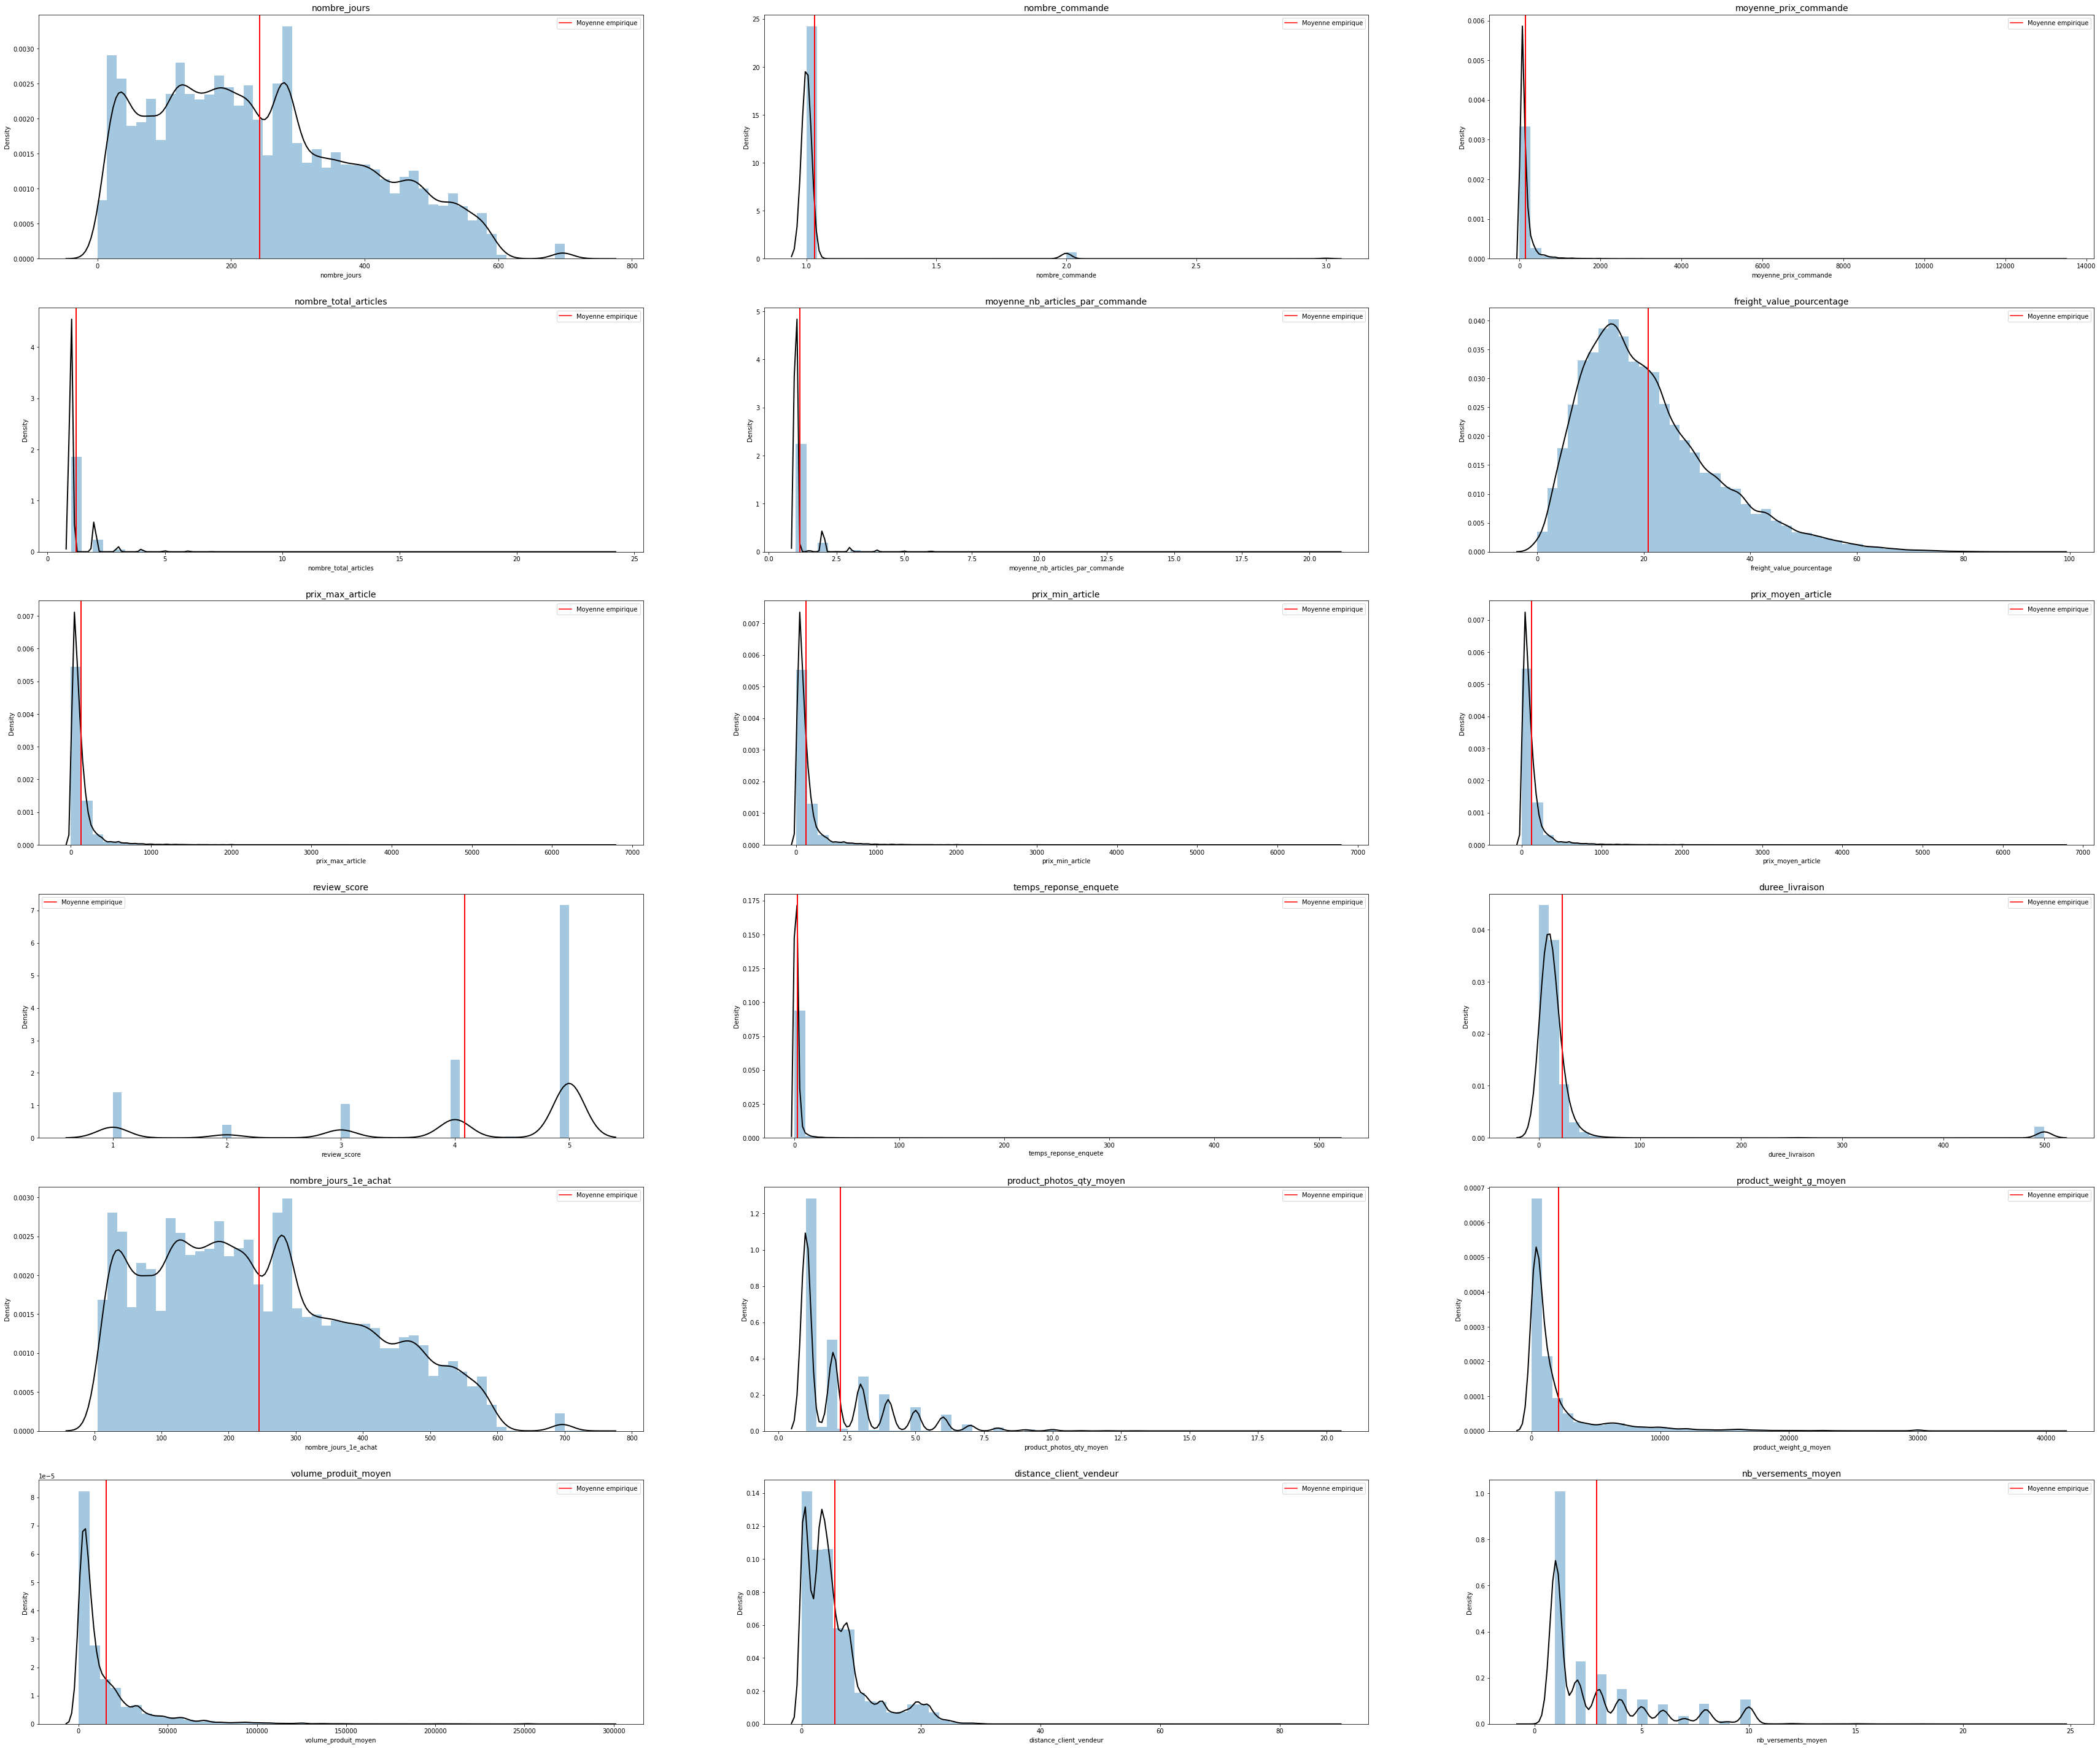

In [168]:
## Histogramme de chaque variable
fig = plt.figure(figsize=(60, 60))
for i in range(len(var_quanti)):
    ax = fig.add_subplot(7,3, (i+1))
    h = distibution(data1, var_quanti[i])
    ax.set_title(var_quanti[i], fontsize=14)

Pour la variable nombre_jours
Moyenne de nombre_jours : 243.05571367814963
Variance de nombre_jours :  23450.696942878294
La moyenne théorique de nombre_jours est comprise entre 242.06 et 244.05
La variance théorique de nombre_jours est comprise entre 23237.77 et 23667.1
Médiane de nombre_jours : 223.0
Mode de nombre_jours :  0    283
dtype: int64
Ecart-type de nombre_jours : 153.13620389339124
Skewness de nombre_jours : 0.456317299548964
Kurtosis de nombre_jours : -0.6463325645358027
Boxplot de nombre_jours :


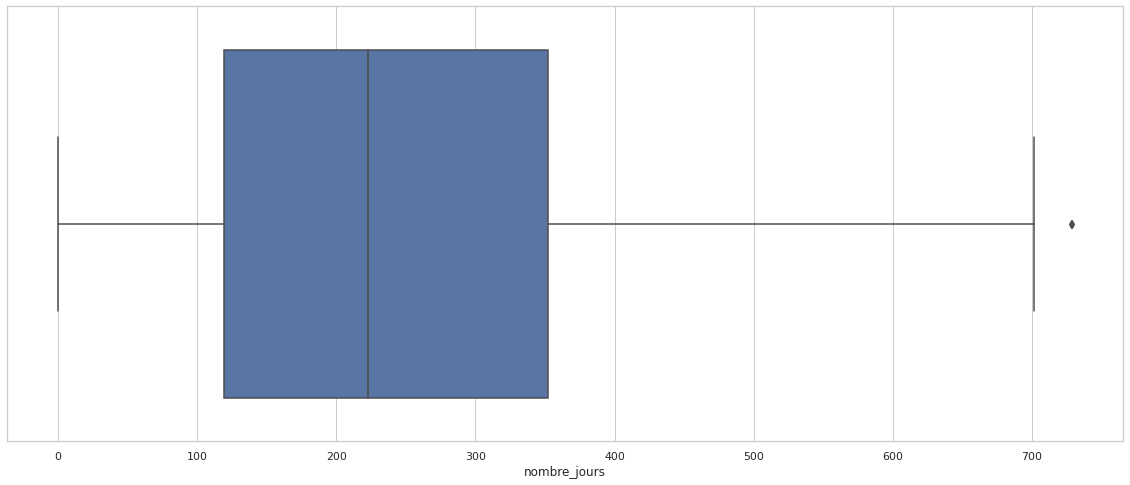

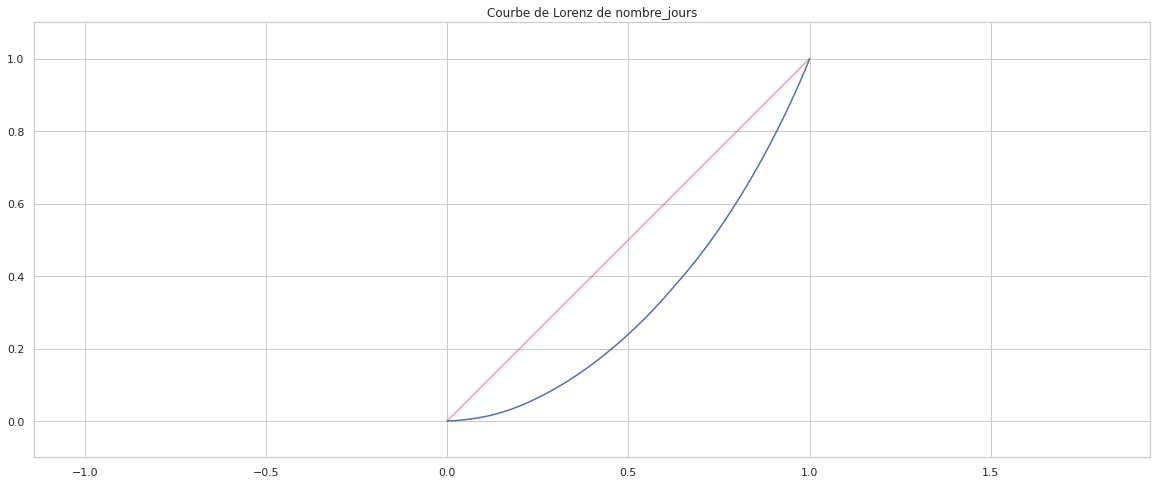

Indice de Gini de nombre_jours est : 0.35838281389109417




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable nombre_commande
Moyenne de nombre_commande : 1.0321915791539895
Variance de nombre_commande :  0.03588805420150014
La moyenne théorique de nombre_commande est comprise entre 1.03 et 1.03
La variance théorique de nombre_commande est comprise entre 0.04 et 0.04
Médiane de nombre_commande : 1.0
Mode de nombre_commande :  0    1
dtype: int64
Ecart-type de nombre_commande : 0.1894414268355793
Skewness de nombre_commande : 6.308773653993269
Kurtosis de nombre_commande : 43.257159054279434
Boxplot de nombre_commande :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


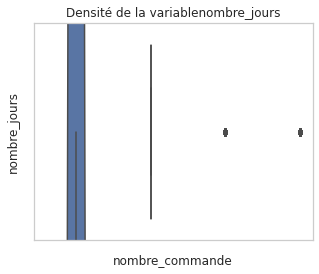

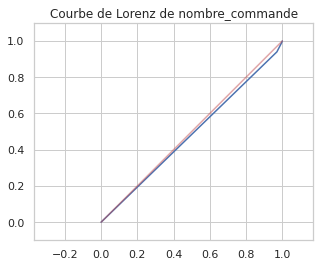

Indice de Gini de nombre_commande est : 0.030320376448598307




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable moyenne_prix_commande
Moyenne de moyenne_prix_commande : 141.81026161961762
Variance de moyenne_prix_commande :  48985.95248851084
La moyenne théorique de moyenne_prix_commande est comprise entre 140.38 et 143.24
La variance théorique de moyenne_prix_commande est comprise entre 48541.17 et 49437.99
Médiane de moyenne_prix_commande : 89.0
Mode de moyenne_prix_commande :  0    59.9
dtype: float64
Ecart-type de moyenne_prix_commande : 221.32770384321717
Skewness de moyenne_prix_commande : 10.041269888500171
Kurtosis de moyenne_prix_commande : 263.16142611844344
Boxplot de moyenne_prix_commande :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


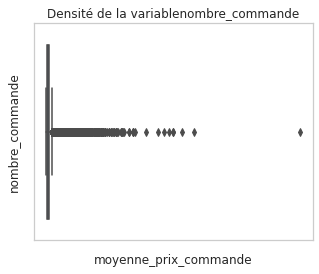

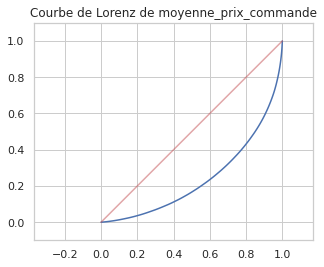

Indice de Gini de moyenne_prix_commande est : 0.5228041166070888




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable nombre_total_articles
Moyenne de nombre_total_articles : 1.2120914711944253
Variance de nombre_total_articles :  0.46150023420454445
La moyenne théorique de nombre_total_articles est comprise entre 1.21 et 1.22
La variance théorique de nombre_total_articles est comprise entre 0.46 et 0.47
Médiane de nombre_total_articles : 1.0
Mode de nombre_total_articles :  0    1
dtype: int64
Ecart-type de nombre_total_articles : 0.6793380853481898
Skewness de nombre_total_articles : 7.09207218785498
Kurtosis de nombre_total_articles : 103.533726089469
Boxplot de nombre_total_articles :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


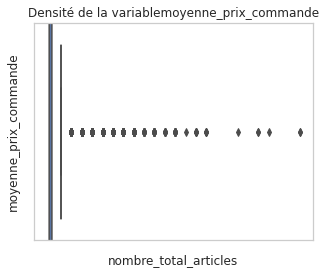

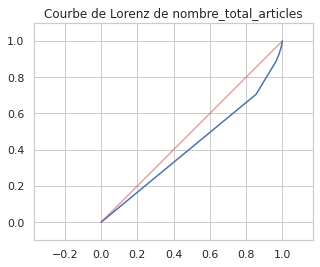

Indice de Gini de nombre_total_articles est : 0.15640015954176556




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable moyenne_nb_articles_par_commande
Moyenne de moyenne_nb_articles_par_commande : 1.1391366748696554
Variance de moyenne_nb_articles_par_commande :  0.2785461119179947
La moyenne théorique de moyenne_nb_articles_par_commande est comprise entre 1.14 et 1.14
La variance théorique de moyenne_nb_articles_par_commande est comprise entre 0.28 et 0.28
Médiane de moyenne_nb_articles_par_commande : 1.0
Mode de moyenne_nb_articles_par_commande :  0    1.0
dtype: float64
Ecart-type de moyenne_nb_articles_par_commande : 0.5277746791178928
Skewness de moyenne_nb_articles_par_commande : 7.650166721158668
Kurtosis de moyenne_nb_articles_par_commande : 121.34588589896725
Boxplot de moyenne_nb_articles_par_commande :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


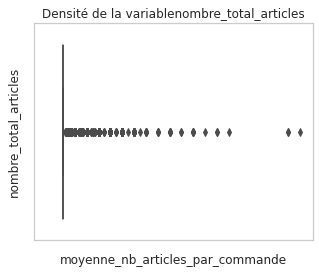

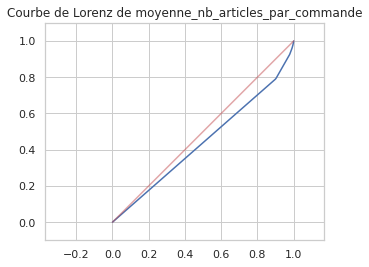

Indice de Gini de moyenne_nb_articles_par_commande est : 0.11305176412635709




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable freight_value_pourcentage
Moyenne de freight_value_pourcentage : 20.86999192851899
Variance de freight_value_pourcentage :  156.3694386237768
La moyenne théorique de freight_value_pourcentage est comprise entre 20.79 et 20.95
La variance théorique de freight_value_pourcentage est comprise entre 154.95 et 157.81
Médiane de freight_value_pourcentage : 18.329340013069046
Mode de freight_value_pourcentage :  0    0.0
dtype: float64
Ecart-type de freight_value_pourcentage : 12.504776632302425
Skewness de freight_value_pourcentage : 1.0559243495775574
Kurtosis de freight_value_pourcentage : 1.1915106354977887
Boxplot de freight_value_pourcentage :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


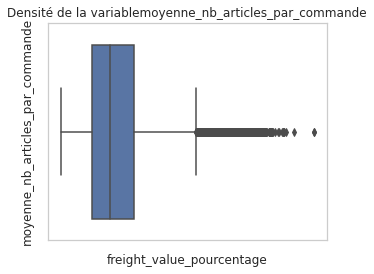

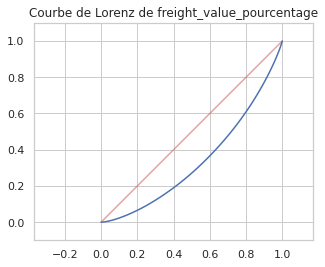

Indice de Gini de freight_value_pourcentage est : 0.32598857588728636




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable prix_max_article
Moyenne de prix_max_article : 128.3229990950005
Variance de prix_max_article :  37442.48913024196
La moyenne théorique de prix_max_article est comprise entre 127.07 et 129.58
La variance théorique de prix_max_article est comprise entre 37102.52 et 37788.0
Médiane de prix_max_article : 79.9
Mode de prix_max_article :  0    59.9
dtype: float64
Ecart-type de prix_max_article : 193.50061790661536
Skewness de prix_max_article : 7.655485804464004
Kurtosis de prix_max_article : 113.35757625417172
Boxplot de prix_max_article :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


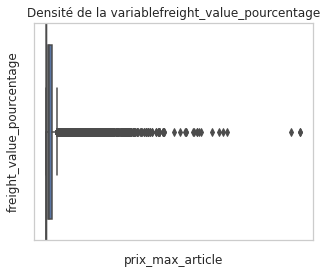

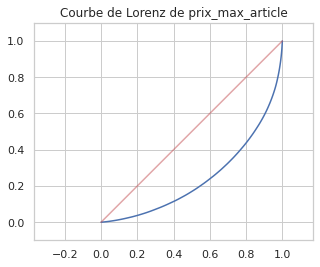

Indice de Gini de prix_max_article est : 0.5169544450010939




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable prix_min_article
Moyenne de prix_min_article : 124.78778737429805
Variance de prix_min_article :  36434.1403939556
La moyenne théorique de prix_min_article est comprise entre 123.55 et 126.02
La variance théorique de prix_min_article est comprise entre 36103.33 et 36770.35
Médiane de prix_min_article : 77.9
Mode de prix_min_article :  0    59.9
dtype: float64
Ecart-type de prix_min_article : 190.87729145698708
Skewness de prix_min_article : 7.741029914764824
Kurtosis de prix_min_article : 115.66366516928164
Boxplot de prix_min_article :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


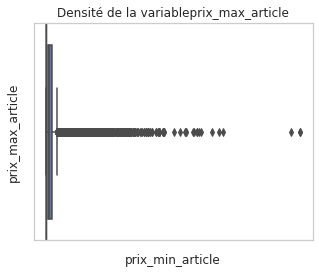

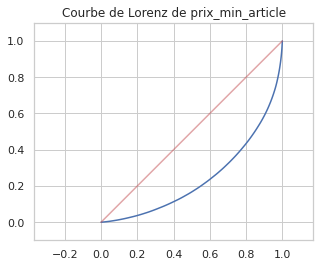

Indice de Gini de prix_min_article est : 0.5206329077132852




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable prix_moyen_article
Moyenne de prix_moyen_article : 126.45645173786453
Variance de prix_moyen_article :  36621.77852843146
La moyenne théorique de prix_moyen_article est comprise entre 125.22 et 127.7
La variance théorique de prix_moyen_article est comprise entre 36289.26 et 36959.72
Médiane de prix_moyen_article : 79.0
Mode de prix_moyen_article :  0    59.9
dtype: float64
Ecart-type de prix_moyen_article : 191.36817532816542
Skewness de prix_moyen_article : 7.725939239543437
Kurtosis de prix_moyen_article : 115.31028751083173
Boxplot de prix_moyen_article :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


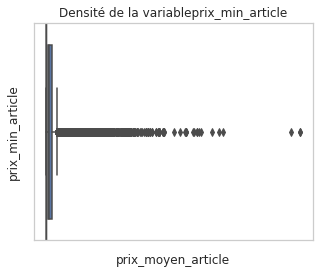

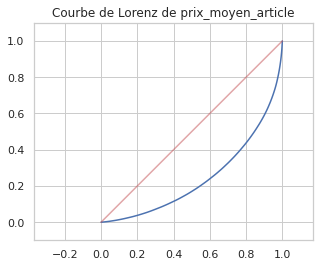

Indice de Gini de prix_moyen_article est : 0.5165776925726724




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable review_score
Moyenne de review_score : 4.087545149756034
Variance de review_score :  1.7897073578416243
La moyenne théorique de review_score est comprise entre 4.08 et 4.1
La variance théorique de review_score est comprise entre 1.77 et 1.81
Médiane de review_score : 5.0
Mode de review_score :  0    5.0
dtype: float64
Ecart-type de review_score : 1.337799446046239
Skewness de review_score : -1.3644593179887983
Kurtosis de review_score : 0.5308778743590628
Boxplot de review_score :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


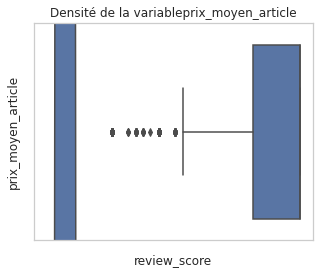

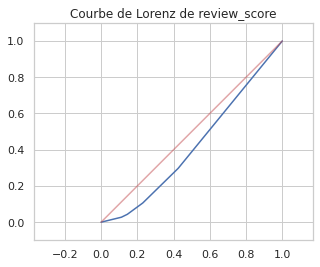

Indice de Gini de review_score est : 0.1577809127974129




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable temps_reponse_enquete
Moyenne de temps_reponse_enquete : 2.5756361989440166
Variance de temps_reponse_enquete :  94.20894703314015
La moyenne théorique de temps_reponse_enquete est comprise entre 2.51 et 2.64
La variance théorique de temps_reponse_enquete est comprise entre 93.35 et 95.08
Médiane de temps_reponse_enquete : 1.0
Mode de temps_reponse_enquete :  0    1.0
dtype: float64
Ecart-type de temps_reponse_enquete : 9.706129353822776
Skewness de temps_reponse_enquete : 23.935306438850816
Kurtosis de temps_reponse_enquete : 816.2635543013758
Boxplot de temps_reponse_enquete :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


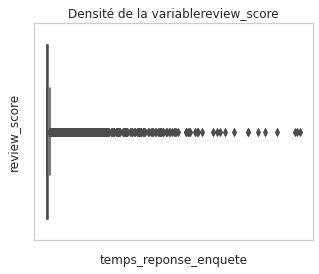

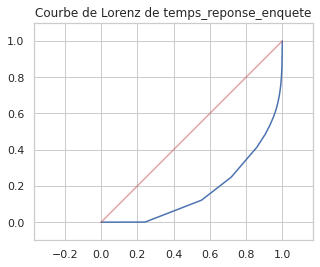

Indice de Gini de temps_reponse_enquete est : 0.6513762213536443




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable duree_livraison
Moyenne de duree_livraison : 23.082665959131575
Variance de duree_livraison :  5069.307500290466
La moyenne théorique de duree_livraison est comprise entre 22.62 et 23.54
La variance théorique de duree_livraison est comprise entre 5023.28 et 5116.09
Médiane de duree_livraison : 10.0
Mode de duree_livraison :  0    7.0
dtype: float64
Ecart-type de duree_livraison : 71.19906951843167
Skewness de duree_livraison : 6.393829949993676
Kurtosis de duree_livraison : 39.72193365160663
Boxplot de duree_livraison :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


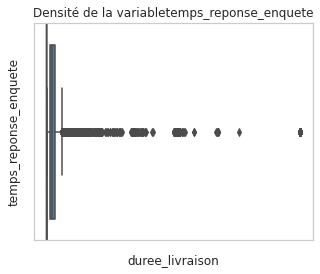

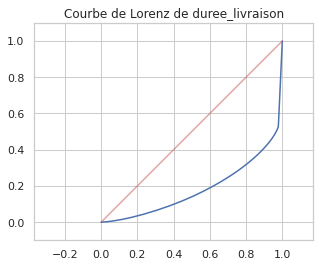

Indice de Gini de duree_livraison est : 0.6346595685596838




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable nombre_jours_1e_achat
Moyenne de nombre_jours_1e_achat : 245.64849892585687
Variance de nombre_jours_1e_achat :  23605.243160553433
La moyenne théorique de nombre_jours_1e_achat est comprise entre 244.65 et 246.64
La variance théorique de nombre_jours_1e_achat est comprise entre 23390.91 et 23823.07
Médiane de nombre_jours_1e_achat : 226.0
Mode de nombre_jours_1e_achat :  0    283
dtype: int64
Ecart-type de nombre_jours_1e_achat : 153.6399790437158
Skewness de nombre_jours_1e_achat : 0.4387381231467947
Kurtosis de nombre_jours_1e_achat : -0.6703103924257645
Boxplot de nombre_jours_1e_achat :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


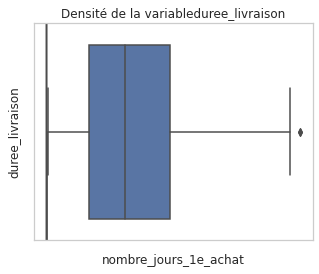

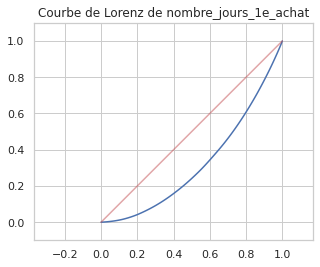

Indice de Gini de nombre_jours_1e_achat est : 0.3560877185734419




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable product_photos_qty_moyen
Moyenne de product_photos_qty_moyen : 2.2475296922633907
Variance de product_photos_qty_moyen :  3.0004951135584847
La moyenne théorique de product_photos_qty_moyen est comprise entre 2.24 et 2.26
La variance théorique de product_photos_qty_moyen est comprise entre 2.97 et 3.03
Médiane de product_photos_qty_moyen : 2.0
Mode de product_photos_qty_moyen :  0    1.0
dtype: float64
Ecart-type de product_photos_qty_moyen : 1.732193728645409
Skewness de product_photos_qty_moyen : 1.8628685917970567
Kurtosis de product_photos_qty_moyen : 4.676158077149067
Boxplot de product_photos_qty_moyen :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


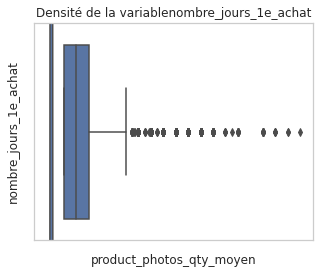

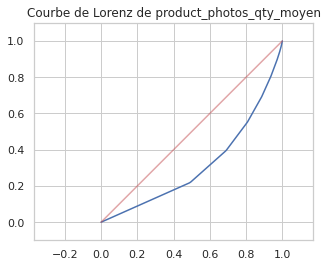

Indice de Gini de product_photos_qty_moyen est : 0.3727383388906955




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable product_weight_g_moyen
Moyenne de product_weight_g_moyen : 2118.491580103654
Variance de product_weight_g_moyen :  14042102.415424233
La moyenne théorique de product_weight_g_moyen est comprise entre 2094.24 et 2142.75
La variance théorique de product_weight_g_moyen est comprise entre 13914603.59 et 14171680.4
Médiane de product_weight_g_moyen : 700.0
Mode de product_weight_g_moyen :  0    200.0
dtype: float64
Ecart-type de product_weight_g_moyen : 3747.2793351209134
Skewness de product_weight_g_moyen : 3.5757154929313058
Kurtosis de product_weight_g_moyen : 16.18459700892513
Boxplot de product_weight_g_moyen :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


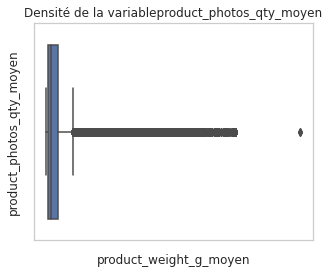

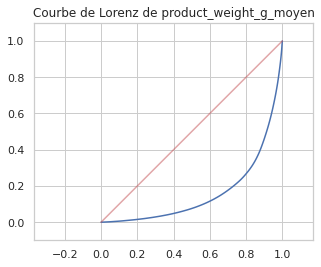

Indice de Gini de product_weight_g_moyen est : 0.6796971925929933




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable volume_produit_moyen
Moyenne de volume_produit_moyen : 15347.076398544663
Variance de volume_produit_moyen :  548609783.2589401
La moyenne théorique de volume_produit_moyen est comprise entre 15195.48 et 15498.68
La variance théorique de volume_produit_moyen est comprise entre 543628541.94 et 553672255.38
Médiane de volume_produit_moyen : 6600.0
Mode de volume_produit_moyen :  0    8000.0
dtype: float64
Ecart-type de volume_produit_moyen : 23422.420525192098
Skewness de volume_produit_moyen : 4.043963547394108
Kurtosis de volume_produit_moyen : 25.220701568234865
Boxplot de volume_produit_moyen :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


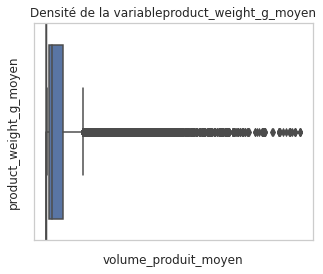

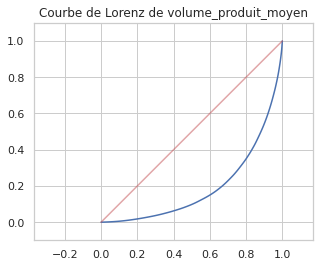

Indice de Gini de volume_produit_moyen est : 0.6173426498548595




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable distance_client_vendeur
Moyenne de distance_client_vendeur : 5.604827128092993
Variance de distance_client_vendeur :  29.51371264850091
La moyenne théorique de distance_client_vendeur est comprise entre 5.57 et 5.64
La variance théorique de distance_client_vendeur est comprise entre 29.25 et 29.79
Médiane de distance_client_vendeur : 4.098120471988705
Mode de distance_client_vendeur :  0    0.0
dtype: float64
Ecart-type de distance_client_vendeur : 5.432652450553128
Skewness de distance_client_vendeur : 1.6694515693620486
Kurtosis de distance_client_vendeur : 3.4410768182080584
Boxplot de distance_client_vendeur :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


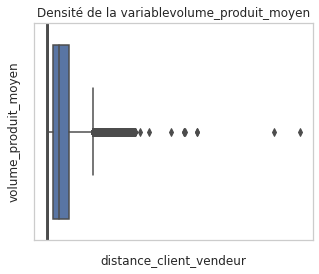

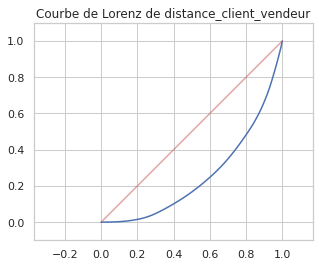

Indice de Gini de distance_client_vendeur est : 0.49225118198942086




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------


Pour la variable nb_versements_moyen
Moyenne de nb_versements_moyen : 2.903763317739174
Variance de nb_versements_moyen :  7.159526191421308
La moyenne théorique de nb_versements_moyen est comprise entre 2.89 et 2.92
La variance théorique de nb_versements_moyen est comprise entre 7.09 et 7.23
Médiane de nb_versements_moyen : 2.0
Mode de nb_versements_moyen :  0    1.0
dtype: float64
Ecart-type de nb_versements_moyen : 2.6757290952974495
Skewness de nb_versements_moyen : 1.6025459562067201
Kurtosis de nb_versements_moyen : 2.3461899400076884
Boxplot de nb_versements_moyen :


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


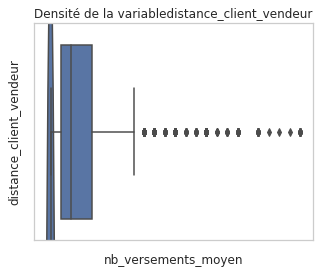

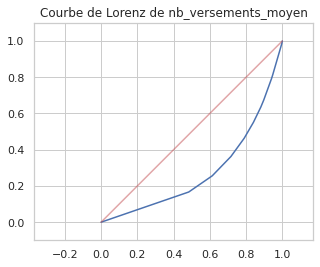

Indice de Gini de nb_versements_moyen est : 0.4500515719150111




/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))




La pvalue du test de Shapiro est  0.0
On rejette donc l'hypothèse nulle de la normalité des données.


-----------------------------------------------------------




/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


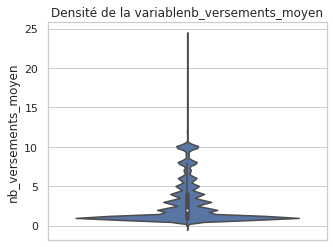

In [169]:
for i in range(len(var_quanti)):
  print('Pour la variable ' + var_quanti[i])
  analyses_univariees_quanti(data1, var_quanti[i])
  print('\n')
  indice_de_gini(data1, var_quanti[i])
  print('\n')
  plt.rcParams["figure.figsize"] = (5, 4)
  sns.violinplot(y = var_quanti[i], data = data1, orient="h").set_title('Densité de la variable' + var_quanti[i])
  print('\n')
  stat, pvalue = stats.shapiro(data1[var_quanti[i]])
  print('La pvalue du test de Shapiro est ', pvalue)
  if pvalue < 0.05:
    print('On rejette donc l\'hypothèse nulle de la normalité des données.')
  else:
    print('On ne peut pas rejetter l\'hypothèse nulle de la normalité des données.')
  print('\n')
  print('-----------------------------------------------------------')
  print('\n')

Pour la variable customer_state
    customer_state
SP        0.420224
RJ        0.128864
MG        0.117469
RS        0.055038
PR        0.050643
SC        0.036619
BA        0.033980
ES        0.020763
GO        0.020120
DF        0.019902
PE        0.016914
CE        0.013708
PA        0.009880
MT        0.009204
MA        0.007579
MS        0.007295
PB        0.005365
PI        0.004984
RN        0.004940
AL        0.004198
SE        0.003533
TO        0.002857
RO        0.002432
AM        0.001527
AC        0.000785
AP        0.000720
RR        0.000458


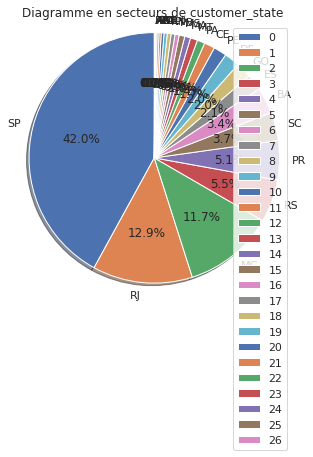

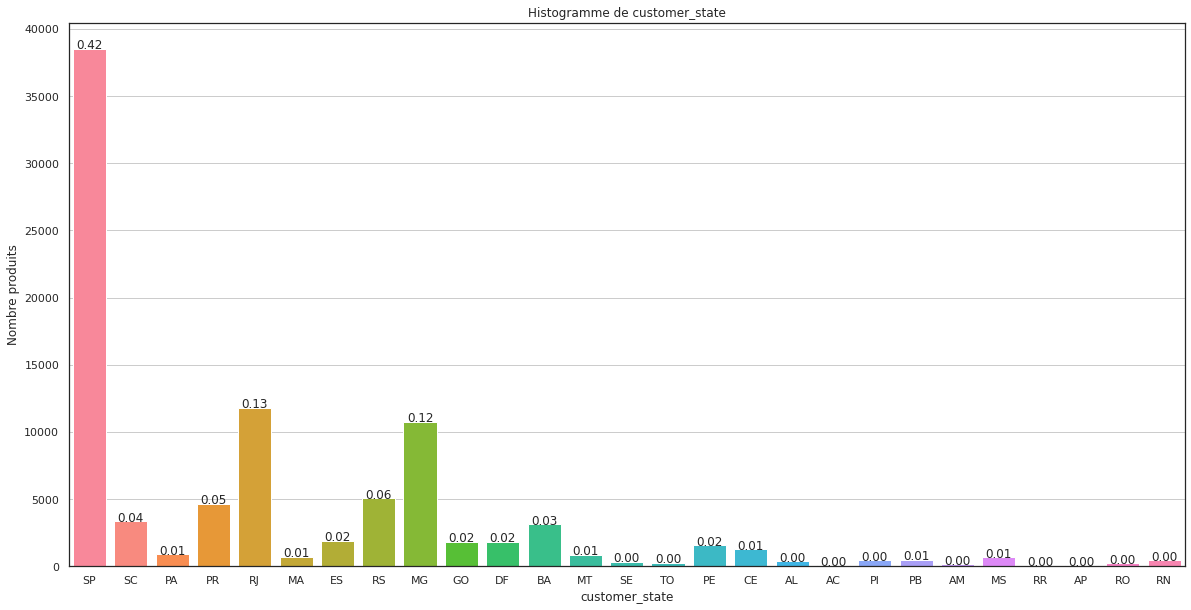



-----------------------------------------------------------


Pour la variable seller_state_mode
    seller_state_mode
SP           0.704900
MG           0.080294
PR           0.078091
RJ           0.044438
SC           0.037895
RS           0.020338
DF           0.007906
BA           0.005572
GO           0.004787
PE           0.004351
MA           0.004166
ES           0.003282
MT           0.001418
CE           0.000894
RN           0.000523
MS           0.000480
PB           0.000349
PI           0.000131
SE           0.000076
RO           0.000065
AM           0.000033
AC           0.000011


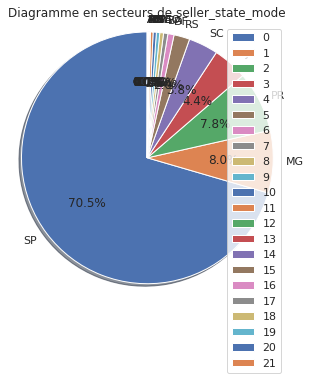

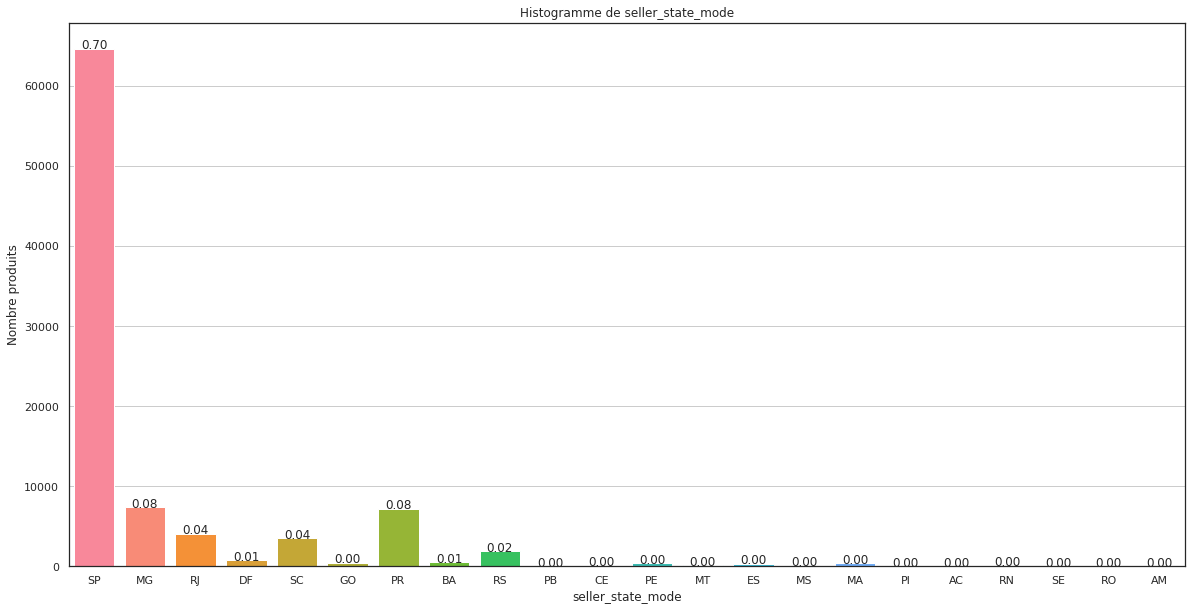



-----------------------------------------------------------


Pour la variable emplacement_vendeur_mode
           emplacement_vendeur_mode
Non local                    0.6408
Local                        0.3592


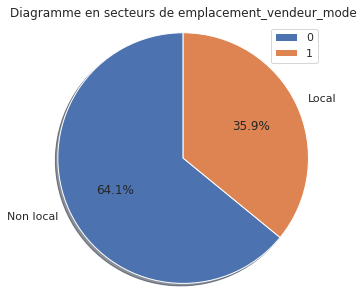

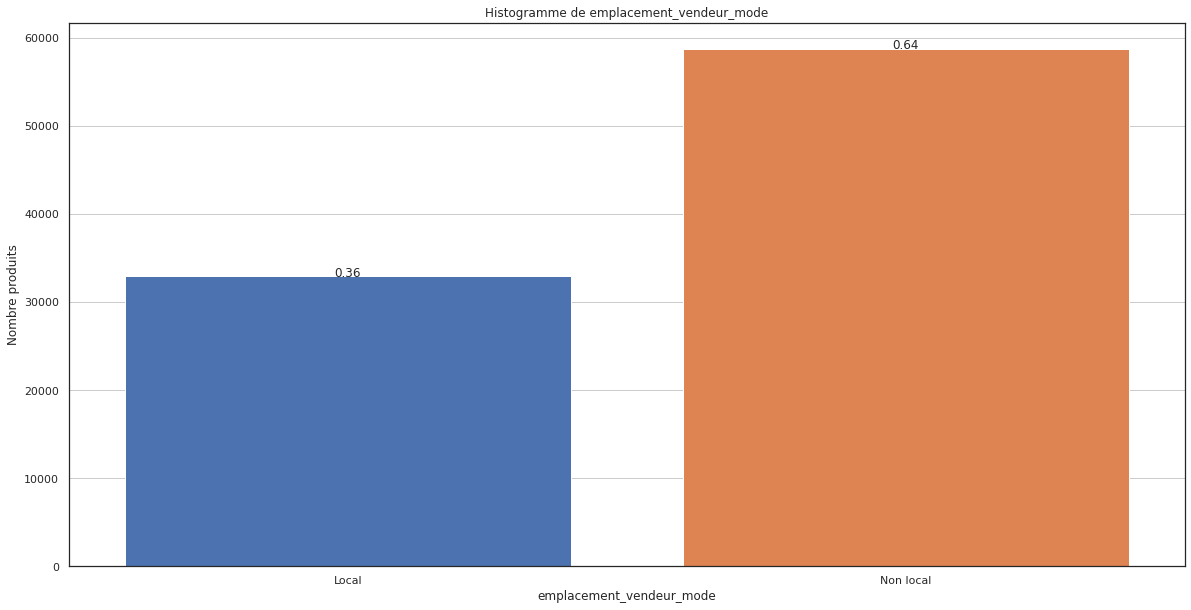



-----------------------------------------------------------


Pour la variable payment_type_credit_card_mode
             payment_type_credit_card_mode
credit_card                       0.758705
autre                             0.241295


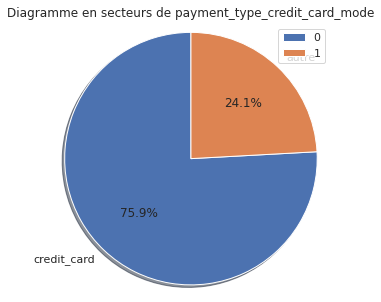

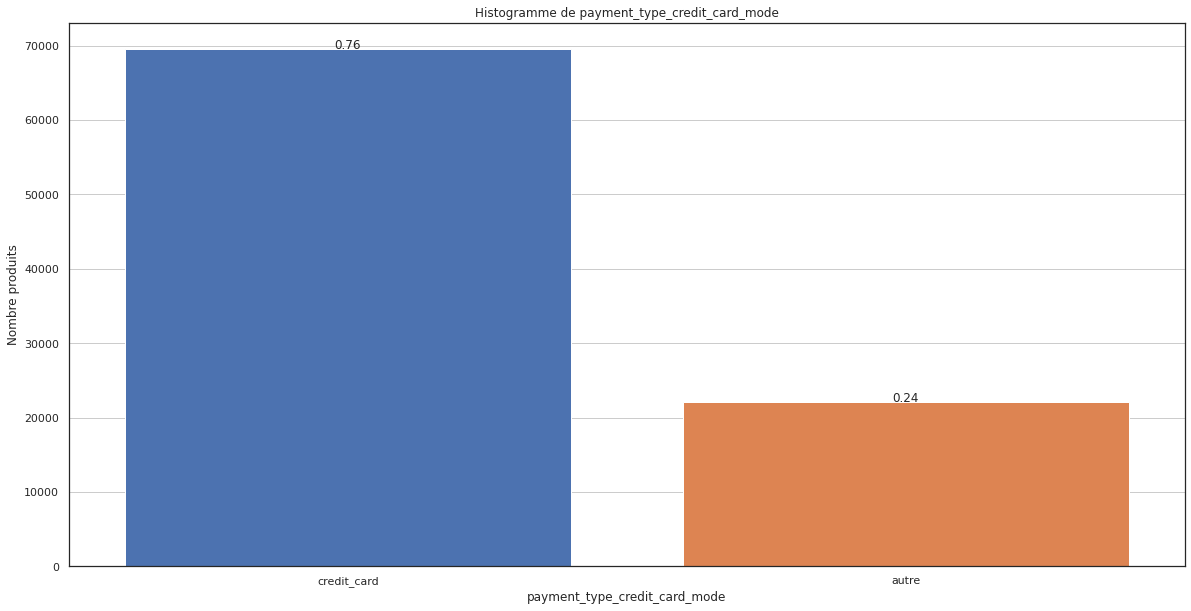



-----------------------------------------------------------


Pour la variable product_category_name_english_mode
                 product_category_name_english_mode
meuble                                     0.181361
divers                                     0.161481
tech                                       0.147883
sante_et_beaute                            0.121525
loisirs                                    0.107218
maison                                     0.083511
enfance                                    0.069051
construction                               0.056161
accessoires                                0.036935
mode                                       0.024056
nourriture                                 0.009367
securite                                   0.001450


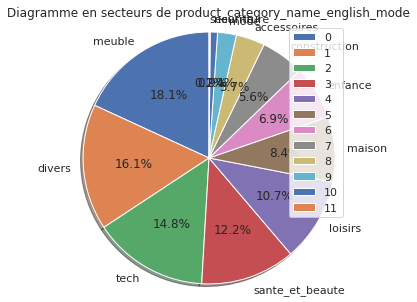

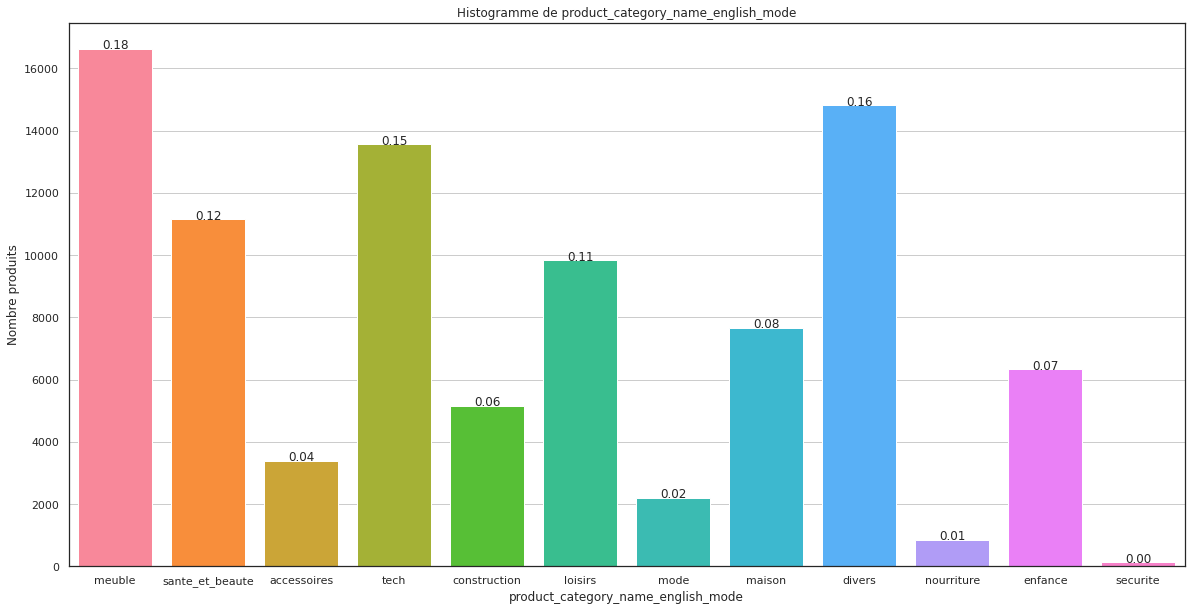



-----------------------------------------------------------




In [172]:
for i in var_quali[1:]:
  print('Pour la variable ' + i)
  analyses_univariees_quali(data1, i)
  print('\n')
  histo_quali(data1, i)
  print('\n')
  print('-----------------------------------------------------------')
  print('\n')

## Analyses bivariées

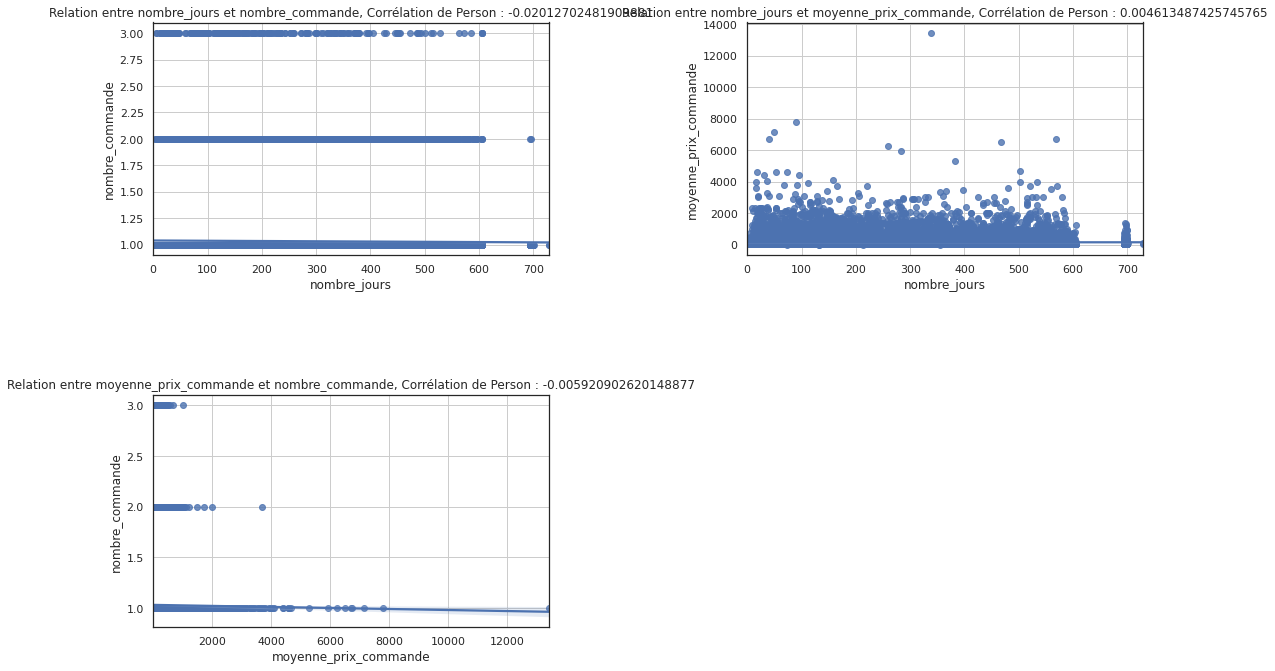

In [173]:
plt.figure(1,figsize=(10,12))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,
                          top = 0.9, wspace = 0.5, hspace = 0.6)

plt.subplot(2,2,1)
sns.regplot(x='nombre_jours', y='nombre_commande', data=data1) # ou sns.lmplot
plt.title('Relation entre nombre_jours et nombre_commande, Corrélation de Person : {}'.format(st.pearsonr(data1['nombre_jours'],data1['nombre_commande'])[0]))

plt.subplot(2,2,2)
sns.regplot(x='nombre_jours', y='moyenne_prix_commande', data=data1) # ou sns.lmplot
plt.title('Relation entre nombre_jours et moyenne_prix_commande, Corrélation de Person : {}'.format(st.pearsonr(data1['nombre_jours'],data1['moyenne_prix_commande'])[0]))

plt.subplot(2,2,3)
sns.regplot(x='moyenne_prix_commande', y='nombre_commande', data=data1) # ou sns.lmplot
plt.title('Relation entre moyenne_prix_commande et nombre_commande, Corrélation de Person : {}'.format(st.pearsonr(data1['moyenne_prix_commande'],data1['nombre_commande'])[0]))

plt.show()

Relation entre temps_reponse_enquete et review_score


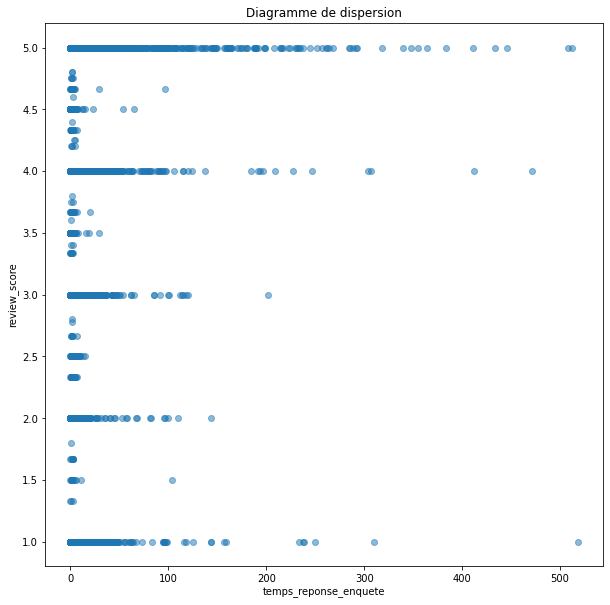

Corrélation de Pearson : 0.007453427061459772


---------------------------------------------------------------


Relation entre duree_livraison et review_score


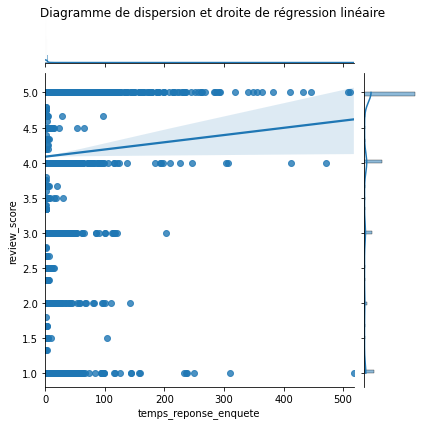

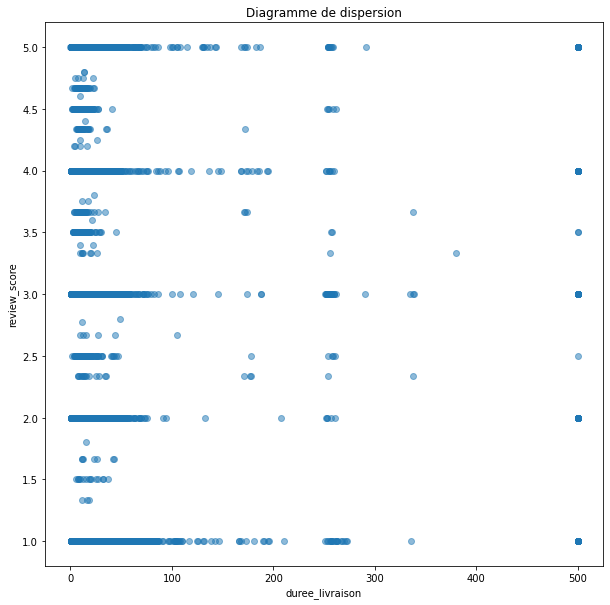

Corrélation de Pearson : -0.30126070470269184


---------------------------------------------------------------


Relation entre nombre_total_articles et nb_versements_moyen


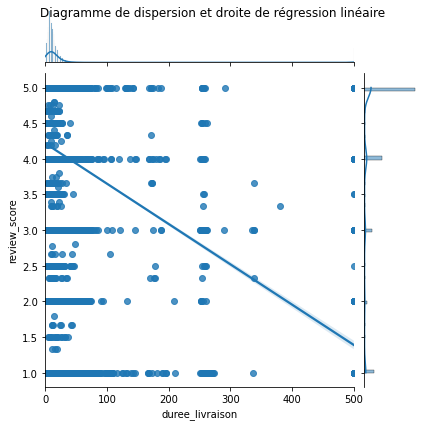

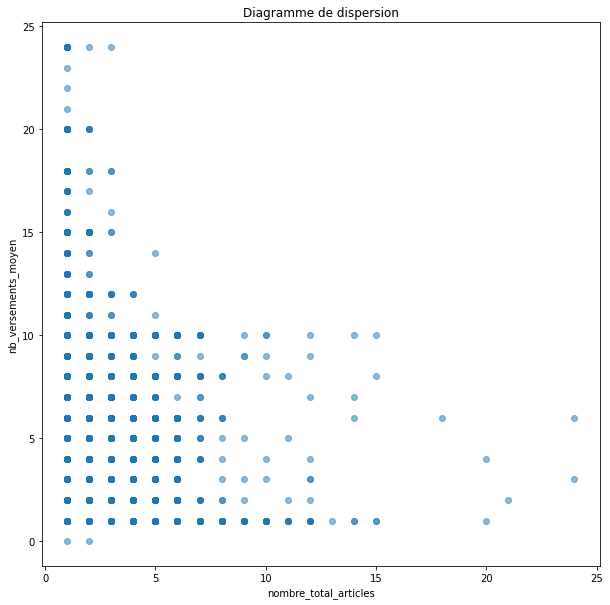

Corrélation de Pearson : 0.04619256053395131


---------------------------------------------------------------


Relation entre moyenne_prix_commande et volume_produit_moyen


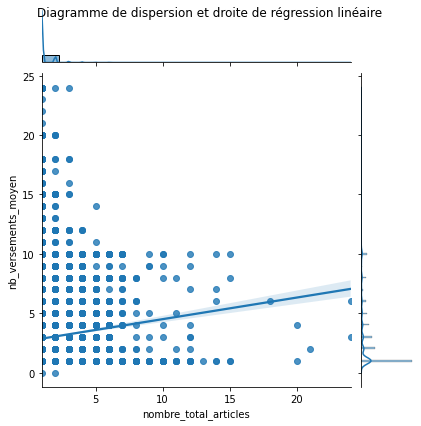

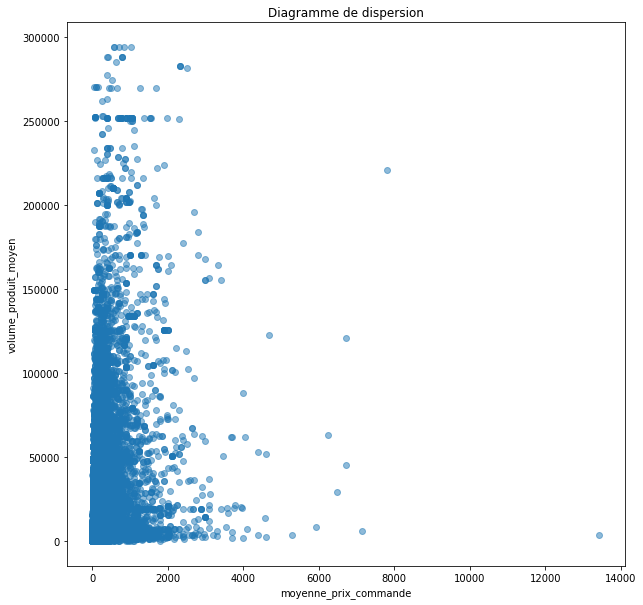

Corrélation de Pearson : 0.29029655758668477


---------------------------------------------------------------


Relation entre product_photos_qty_moyen et moyenne_prix_commande


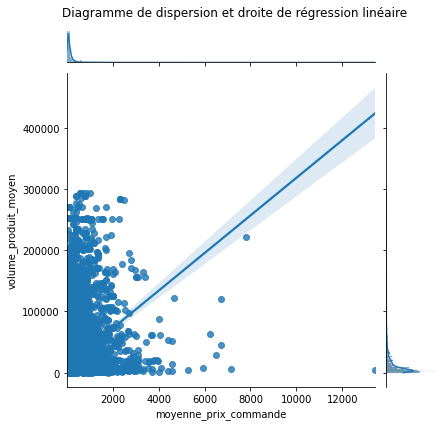

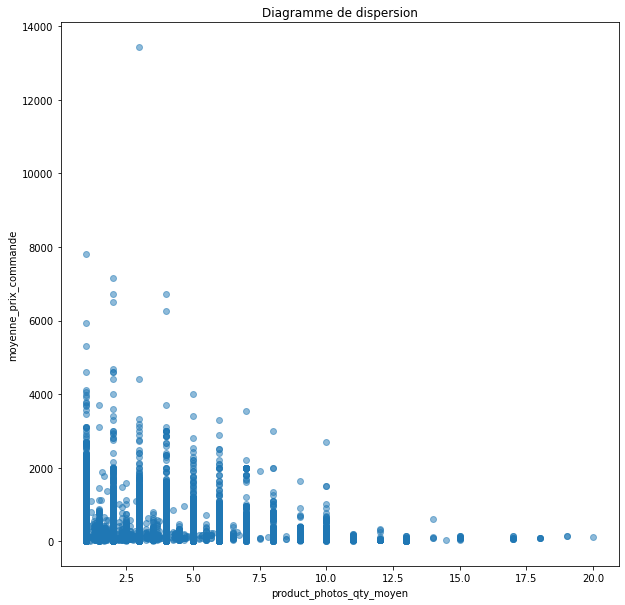

Corrélation de Pearson : 0.03424348010313079


---------------------------------------------------------------


Relation entre moyenne_nb_articles_par_commande et product_weight_g_moyen


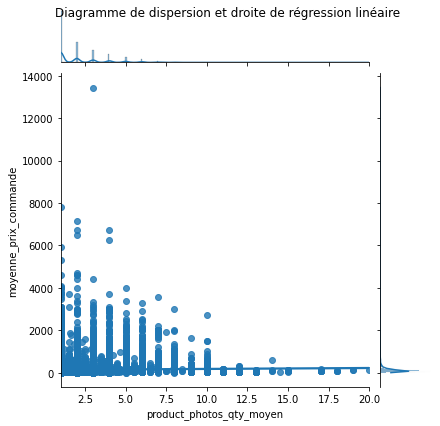

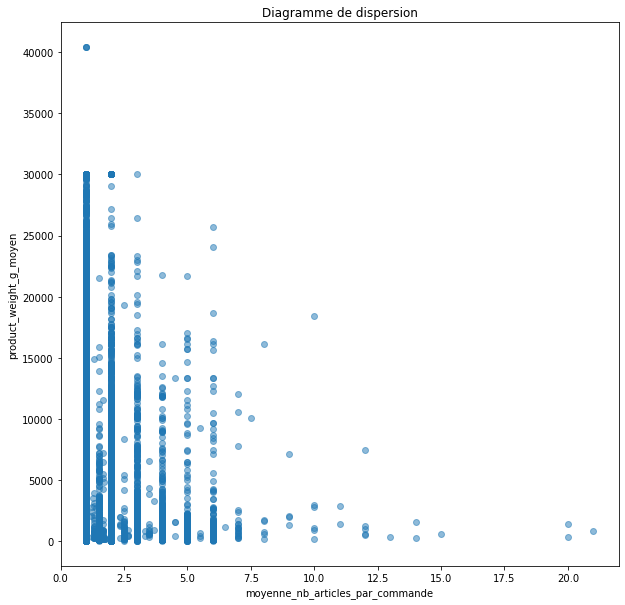

Corrélation de Pearson : -0.003771391854816751


---------------------------------------------------------------


Relation entre distance_client_vendeur et freight_value_pourcentage


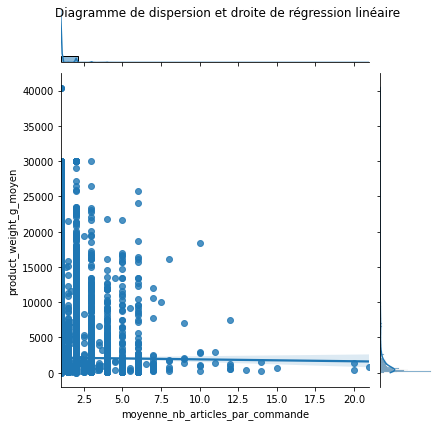

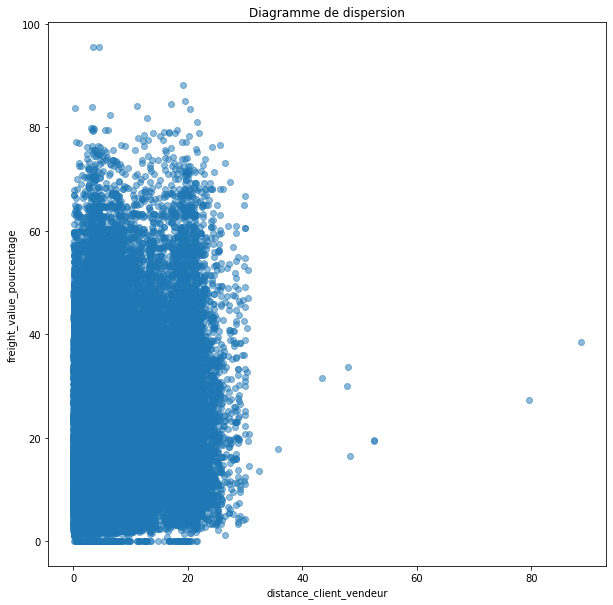

Corrélation de Pearson : 0.22351169704732426


---------------------------------------------------------------




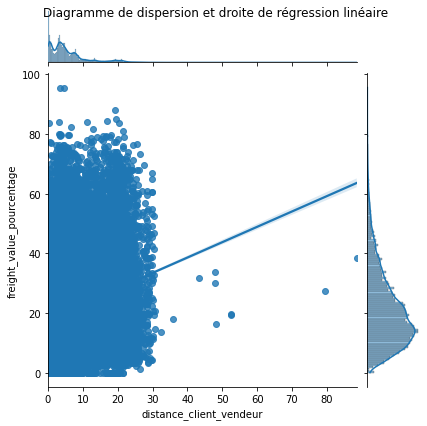

In [165]:
# Relations entre 2 variables quantitatives : Régression linéaire

## Relation entre 'temps_reponse_enquete' et 'review_score'
X = 'temps_reponse_enquete'
Y = 'review_score'
print('Relation entre', X, 'et', Y)
diagramme_dipersion(X, Y, data1)
coeff_stat(X, Y, data1)
print('\n')
print('---------------------------------------------------------------')
print('\n')

## Relation entre 'duree_livraison' et 'review_score'
X = 'duree_livraison'
Y = 'review_score'
print('Relation entre', X, 'et', Y)
diagramme_dipersion(X, Y, data1)
coeff_stat(X, Y, data1)
print('\n')
print('---------------------------------------------------------------')
print('\n')

## Relation entre 'nombre_total_articles' et 'nb_versements_moyen'
X = 'nombre_total_articles'
Y = 'nb_versements_moyen'
print('Relation entre', X, 'et', Y)
diagramme_dipersion(X, Y, data1)
coeff_stat(X, Y, data1)
print('\n')
print('---------------------------------------------------------------')
print('\n')

## Relation entre 'moyenne_prix_commande' et 'volume_produit_moyen'
X = 'moyenne_prix_commande'
Y = 'volume_produit_moyen'
print('Relation entre', X, 'et', Y)
diagramme_dipersion(X, Y, data1)
coeff_stat(X, Y, data1)
print('\n')
print('---------------------------------------------------------------')
print('\n')

## Relation entre 'product_photos_qty_moyen' et 'moyenne_prix_commande'
X = 'product_photos_qty_moyen'
Y = 'moyenne_prix_commande'
print('Relation entre', X, 'et', Y)
diagramme_dipersion(X, Y, data1)
coeff_stat(X, Y, data1)
print('\n')
print('---------------------------------------------------------------')
print('\n')

## Relation entre 'moyenne_nb_articles_par_commande' et 'product_weight_g_moyen'
X = 'moyenne_nb_articles_par_commande'
Y = 'product_weight_g_moyen'
print('Relation entre', X, 'et', Y)
diagramme_dipersion(X, Y, data1)
coeff_stat(X, Y, data1)
print('\n')
print('---------------------------------------------------------------')
print('\n')

## Relation entre 'distance_client_vendeur' et 'freight_value_pourcentage'
X = 'distance_client_vendeur'
Y = 'freight_value_pourcentage'
print('Relation entre', X, 'et', Y)
diagramme_dipersion(X, Y, data1)
coeff_stat(X, Y, data1)
print('\n')
print('---------------------------------------------------------------')
print('\n')

Relation entre payment_type_credit_card_mode et nb_versements_moyen


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


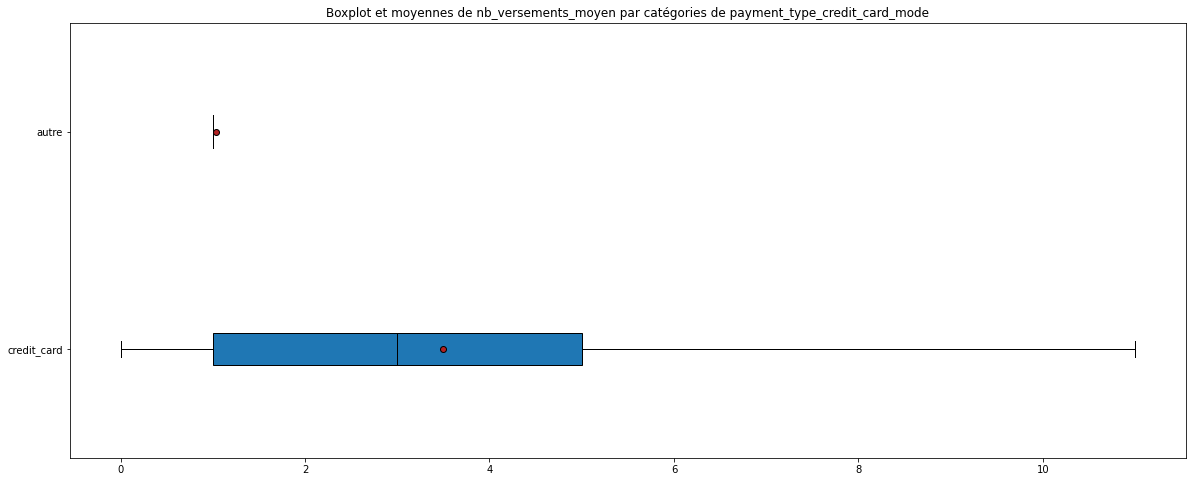

('=Rapport de corrélation n² =', 0.15522485361658034)


---------------------------------------------------------------


Relation entre statut_livraison et review_score


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


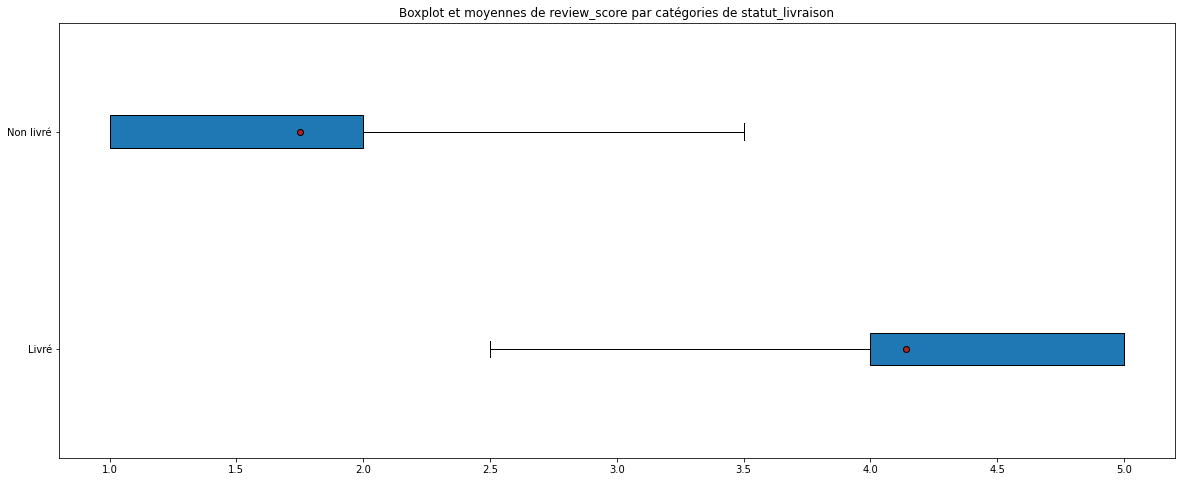

('=Rapport de corrélation n² =', 0.06733301585648133)


---------------------------------------------------------------


Relation entre emplacement_vendeur_mode et freight_value_pourcentage


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


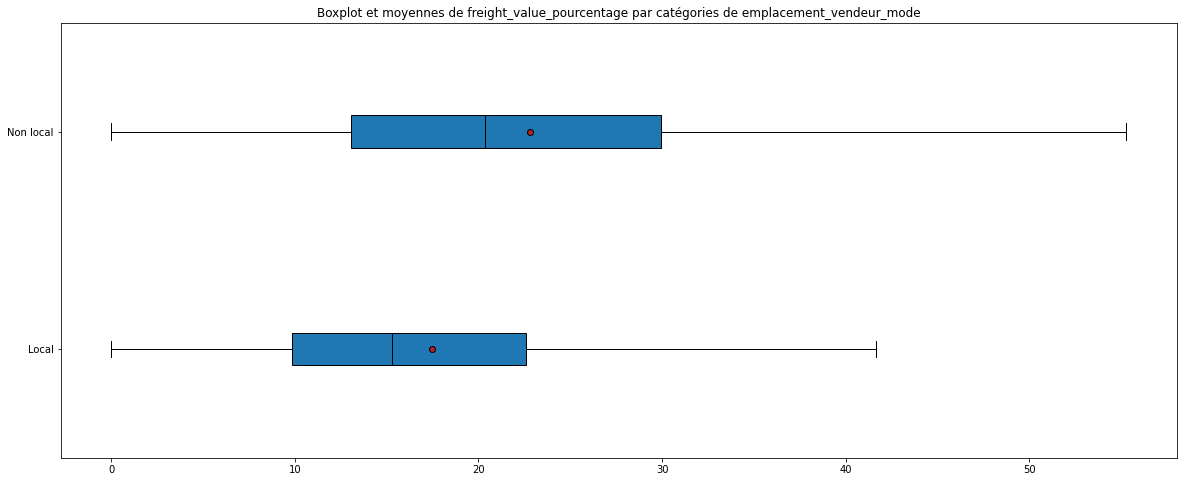

('=Rapport de corrélation n² =', 0.04181890043982434)


---------------------------------------------------------------


Relation entre product_category_name_english_mode et moyenne_prix_commande


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


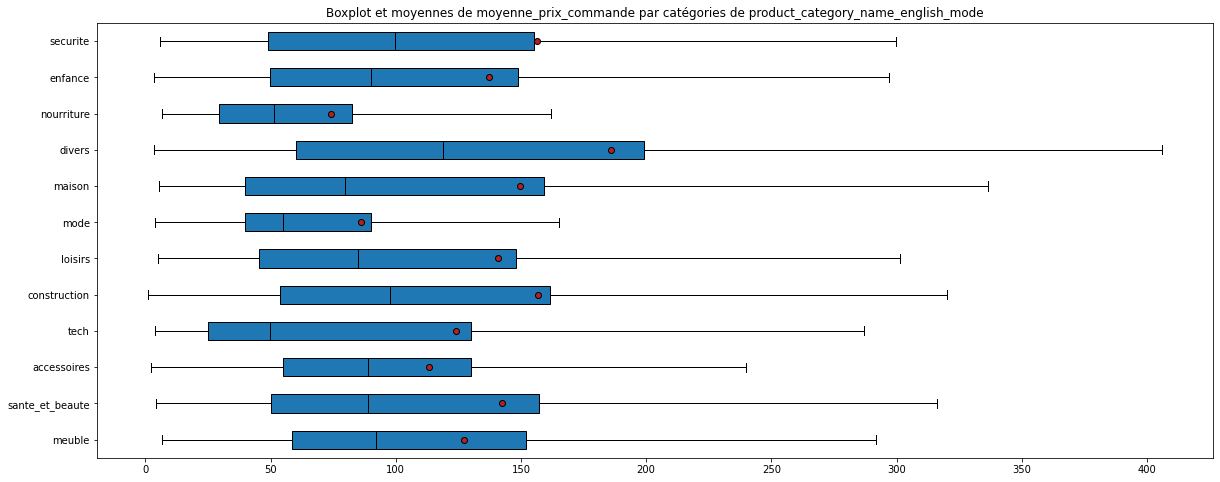

('=Rapport de corrélation n² =', 0.011518952393871686)


In [166]:
# Relations entre un variable quantitative et une variable qualitative : ANOVA

## Relation entre 'nb_versements_moyen' et 'payment_type_credit_card_mode'
Y = 'nb_versements_moyen' # quanti
X = 'payment_type_credit_card_mode' # quali
print('Relation entre', X, 'et', Y)
graphe_uni_quanti_quali(X, Y, data1)
print(eta_squared(X, Y, data1))
print('\n')
print('---------------------------------------------------------------')
print('\n')

## Relation entre 'review_score' et 'statut_livraison'
Y = 'review_score' # quanti
X = 'statut_livraison' # quali
print('Relation entre', X, 'et', Y)
graphe_uni_quanti_quali(X, Y, data1)
print(eta_squared(X, Y, data1))
print('\n')
print('---------------------------------------------------------------')
print('\n')

## Relation entre 'freight_value_pourcentage' et 'emplacement_vendeur_mode'
Y = 'freight_value_pourcentage' # quanti
X = 'emplacement_vendeur_mode' # quali
print('Relation entre', X, 'et', Y)
graphe_uni_quanti_quali(X, Y, data1)
print(eta_squared(X, Y, data1))
print('\n')
print('---------------------------------------------------------------')
print('\n')

## Relation entre 'moyenne_prix_commande' et 'product_category_name_english_mode'
Y = 'moyenne_prix_commande' # quanti
X = 'product_category_name_english_mode' # quali
print('Relation entre', X, 'et', Y)
graphe_uni_quanti_quali(X, Y, data1)
print(eta_squared(X, Y, data1))

Relation entre emplacement_vendeur_mode et product_category_name_english_mode


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Histogramme de product_category_name_english_mode en fonction de emplacement_vendeur_mode')

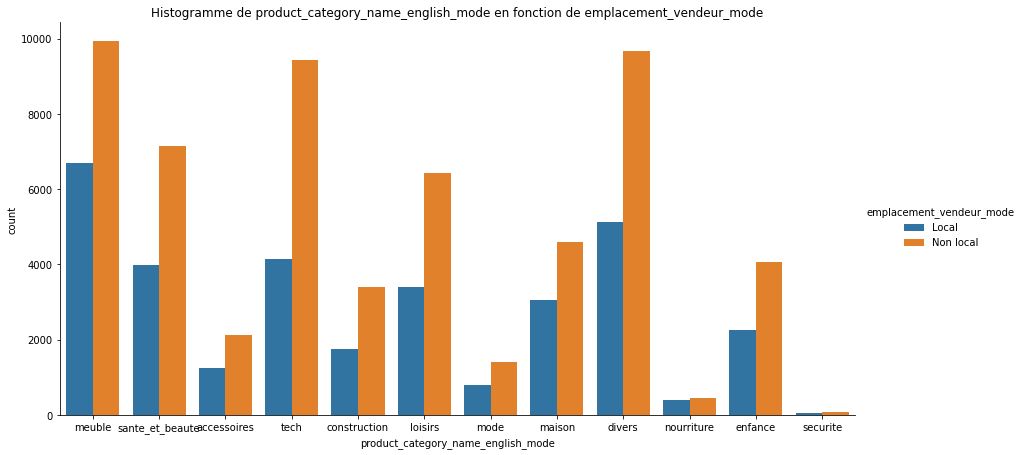

In [168]:
# Relations entre 2 variables qualitatives : Test du Chi2

## Relation entre 'emplacement_vendeur_mode' et 'seller_state_mode'
print('Relation entre emplacement_vendeur_mode et product_category_name_english_mode')

X = 'product_category_name_english_mode'
Y = 'emplacement_vendeur_mode'

sns.factorplot(x = X, hue = Y, data = data1, kind = "count", size=6, aspect=2)
plt.title('Histogramme de product_category_name_english_mode en fonction de emplacement_vendeur_mode')

Tableau de contingence


emplacement_vendeur_mode,Local,Non local,Total
product_category_name_english_mode,,,
accessoires,1255,2132,3387
construction,1743,3407,5150
divers,5130,9678,14808
enfance,2264,4068,6332
loisirs,3401,6431,9832
maison,3067,4591,7658
meuble,6701,9930,16631
mode,796,1410,2206
nourriture,399,460,859


Statistique de test : 447.589824707052
Nombre de ddl : 24
p-value : 1.1914767684865049e-79
Tableau des fréquences obtenues:


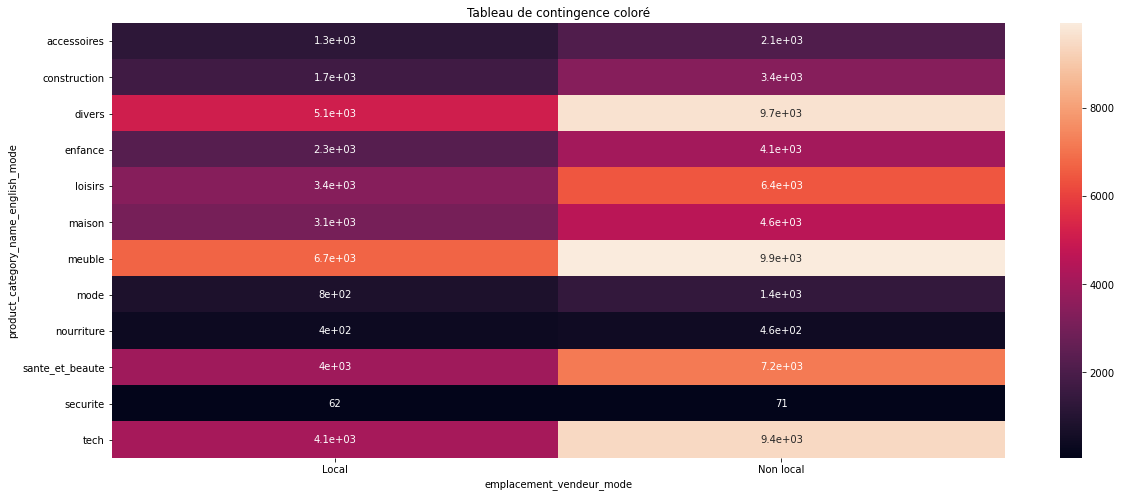

In [169]:
test_Chi2(data1, X, Y)
tableau_contingence(data1, X, Y)